In [2]:
import sys
import warnings
warnings.filterwarnings('ignore')
import time
import datetime as dt
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import csv
import sklearn
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as accuracy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score
import pylab as pl
import MLpipeline as ML
import MLmodelling as MLm
import breaking_the_loop_main as BL
import string
from nltk.stem.snowball import SnowballStemmer
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
df_all = pickle.load(open('df_clean06.p', "rb"))


In [59]:
df_s = pickle.load(open('df_small_classif.p', "rb"))

In [4]:
df.head()

Description       Date  \
39  Hacendado asesinado a bala por un grupo de ind... 1990-01-01   
40  Campesino desaparecido desde el bombardeo de 5... 1990-01-06   
41  Campesinos asesinados por un grupo de individu... 1990-01-07   
42  Campesinos asesinados por un grupo de armados ... 1990-01-08   
43  Pescador capturado por efectivos de la armada ... 1990-01-10   

                              Location  \
39         NORTE DE SANTANDER / TOLEDO   
40                   ANTIOQUIA / YONDÓ   
41  ANTIOQUIA / NECOCLÍ / PUEBLO NUEVO   
42             RISARALDA / PUEBLO RICO   
43                 BOLÍVAR / SAN PABLO   

                                               Victim Alleged_Responsible  \
39             MOGOLLÓN V. JOSE D701 | Víctimas Ind:1                 ELN   
40               GUERRA CATALINO B48 | Víctimas Ind:1     SIN INFORMACIÓN   
41  GALVAN J. DOMINGO JOSE D701, DÍAZ O. JUAN BAUT...                 EPL   
42  VALENCIA V. WILLIAM D701, GRANADA M. CAMPO ELI...                 EPL   
43  ORDUZ LIBARDO D72, A10, D701, A12 | Víctimas I...            EJERCITO   

                                                 Type  year    month  \
39   PERSONAS:HOMICIDIO INTENCIONAL DE PERSONA PRO...  1990  January   
40                         PERSECUCIÓN POLÍTICA:RAPTO  1990  January   
41   PERSONAS:HOMICIDIO INTENCIONAL DE PERSONA PRO...  1990  January   
42   PERSONAS:HOMICIDIO INTENCIONAL DE PERSONA PRO...  1990  January   
43   PERSECUCIÓN POLÍTICA:EJECUCIÓN EXTRAJUDICIAL,...  1990  January   

       mnth_yr            Dep_name    ...              weapon torture threat  \
39  1990-01-01  NORTE DE SANTANDER    ...         ['firegun']       0      0   
40  1990-01-01           ANTIOQUIA    ...      ['explosives']       0      0   
41  1990-01-01           ANTIOQUIA    ...             unknown       0      0   
42  1990-01-01           RISARALDA    ...             unknown       0      0   
43  1990-01-01             BOLÍVAR    ...      ['explosives']       1      0   

   gov_vict civ_leader camp_vict infr  murder  int_label  selec_adh  
39        1          0         1    0       1          1          0  
40        0          0         1    0       0          0          1  
41        1          0         1    0       1          1          0  
42        1          0         1    0       1          1          0  
43        0          0         0    0       1          1          0  

[5 rows x 26 columns]

In [5]:
feats_to_binarize = ['month','weapon','Dep_name']

In [9]:
ML.binarize(df, 'month', ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'Septmeber',\
                    'October', 'November'], drop_orig=True)

In [60]:
ML.binarize(df_s, 'month', ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'Septmeber',\
                    'October', 'November'], drop_orig=True)

In [61]:
list(df['Alleged_Responsible'].unique())

KeyError: 'Alleged_Responsible'

In [63]:
ML.binarize(df_s,'weapon', ["['firegun']",
 "['explosives']",
 'unknown',
 "['machine gun / large cap']",
 "['firegun', 'explosives']",
 "['firegun', 'knive']",
 "['knive']",
 "['explosives', 'knive']",
 "['firegun', 'explosives', 'knive']",
 "['firegun', 'explosives', 'machine gun / large cap']",
 "['firegun', 'machine gun / large cap']",
 "['firegun', 'explosives', 'knive', 'machine gun / large cap']",
 "['explosives', 'machine gun / large cap']",
 "['explosives', 'knive', 'machine gun / large cap']",
 "['knive', 'machine gun / large cap']"])

In [64]:
ML.binarize(df_s,'Dep_name',['NORTE DE SANTANDER', 'ANTIOQUIA', 'RISARALDA','BOLÍVAR','CÓRDOBA','SANTANDER',\
                         'CUNDINAMARCA','CESAR', 'MAGDALENA',
 'SUCRE',
 'CHOCÓ',
 'META',
 'CAUCA',
 'VALLE DEL CAUCA',
 'BOGOTÁ, D.C.',
 'GUAVIARE',
 'TOLIMA',
 'ARAUCA',
 'PUTUMAYO',
 'LA GUAJIRA',
 'NARIÑO',
 'CASANARE',
 'HUILA',
 'BOYACÁ',
 'EXTERIOR',
 '',
 'ATLÁNTICO',
 'VICHADA',
 'CALDAS',
 'CAQUETÁ',
 'QUINDIO',
 'AMAZONAS',
 'GUAINÍA',
 'VAUPÉS',
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'])

In [65]:
ML.binarize(df_s,'Alleged_Responsible', ['ELN',
 'SIN INFORMACIÓN',
 'EPL',
 'EJERCITO',
 'PARAMILITARES',
 'POLICÍA',
 'DAS, EJERCITO',
 'FARC-EP',
 'GUERRILLA'])

In [85]:
df_s['length_des'] = len(df_s.Description)
df_s['length_des'] = df_s['length_des'].apply(ML.standarize, args=(df_s['length_des'].mean(), df_s['length_des'].std()))

AttributeError: 'DataFrame' object has no attribute 'Description'

In [86]:
df_s.columns

Index(['num_vict', 'torture', 'threat', 'gov_vict', 'civ_leader', 'camp_vict',
       'infr', 'murder', 'int_label', 'selec_adh', 'Label', 'January_dum',
       'February_dum', 'March_dum', 'April_dum', 'May_dum', 'June_dum',
       'July_dum', 'August_dum', 'Septmeber_dum', 'October_dum',
       'November_dum', '['firegun']_dum', '['explosives']_dum', 'unknown_dum',
       '['machine gun / large cap']_dum', '['firegun', 'explosives']_dum',
       '['firegun', 'knive']_dum', '['knive']_dum',
       '['explosives', 'knive']_dum', '['firegun', 'explosives', 'knive']_dum',
       '['firegun', 'explosives', 'machine gun / large cap']_dum',
       '['firegun', 'machine gun / large cap']_dum',
       '['firegun', 'explosives', 'knive', 'machine gun / large cap']_dum',
       '['explosives', 'machine gun / large cap']_dum',
       '['explosives', 'knive', 'machine gun / large cap']_dum',
       '['knive', 'machine gun / large cap']_dum', 'NORTE DE SANTANDER_dum',
       'ANTIOQUIA_dum', 'RISA

In [67]:
df_s = df_s.drop(['Description', 'Date', 'Location', 'Victim', 'Type', 'year', 'mnth_yr',
       'Mun_name', 'Pob_name', 'Mun_code', 'Pob_code', 'Description_clean'], axis=1)

In [83]:
df_s

num_vict  torture  threat  gov_vict  civ_leader  camp_vict  infr  \
37327 -0.274372        0       1         1           0          0     0   
8451  -0.274372        0       0         1           1          0     0   
29318  0.134625        0       0         0           0          0     0   
32054  0.134625        0       0         0           0          0     0   
9221  -0.274372        0       0         0           1          0     0   
28886 -0.478871        1       0         0           0          0     0   
37352 -0.478871        0       0         0           0          0     0   
12819 -0.274372        0       0         0           0          1     0   
32325 -0.274372        0       0         0           0          0     0   
27775 -0.274372        0       0         1           1          0     0   
231   -0.069874        0       0         0           0          1     0   
16208 -0.274372        0       0         1           0          0     0   
12546 -0.274372        0       0         1           1          0     0   
3176  -0.069874        0       0         0           0          0     0   
24896  0.134625        0       1         0           1          0     0   
34215 -0.274372        0       0         1           1          0     0   
13568  0.748120        0       0         0           0          0     0   
11292 -0.274372        1       0         1           0          0     1   
27608 -0.274372        1       1         0           0          0     0   
32484 -0.274372        0       0         0           0          1     0   
36824 -0.069874        0       0         0           0          0     0   
35125  0.339123        0       1         0           0          1     0   
16502  1.361615        0       0         0           0          0     0   
38149 -0.274372        1       0         0           0          0     0   
36450 -0.274372        0       0         0           1          0     0   
29338 -0.478871        0       0         1           0          0     1   
24494 -0.274372        0       0         0           0          0     0   
18200  0.134625        1       1         1           1          0     1   
29692 -0.069874        1       0         0           0          1     0   
9728   0.339123        0       0         0           0          0     0   
...         ...      ...     ...       ...         ...        ...   ...   
42493 -0.274372        0       0         1           0          0     0   
11216 -0.069874        0       0         0           0          0     0   
22024 -0.069874        0       0         0           0          0     0   
36098 -0.478871        0       0         0           0          0     1   
21198 -0.274372        0       1         0           0          0     0   
23272 -0.274372        0       0         0           0          0     0   
5676  -0.274372        0       0         1           0          0     0   
12691 -0.274372        0       0         0           0          1     0   
41738 -0.069874        0       0         0           0          0     0   
9703  -0.274372        0       1         0           0          0     0   
5075   0.543622        0       0         0           0          1     0   
22204  0.543622        0       0         0           1          0     0   
32183 -0.274372        1       0         0           1          0     0   
31272  0.339123        0       1         0           0          0     0   
35311  0.134625        0       0         0           0          0     0   
42765 -0.478871        0       0         1           1          0     0   
11347 -0.274372        0       0         1           1          0     0   
37551 -0.274372        0       0         1           1          0     0   
25566 -0.274372        0       0         0           0          0     0   
8070  -0.274372        0       0         1           0          0     0   
29143  0.543622        0       0         0           0          1     0   
499   -0.069874        0       0

In [68]:
df_s['num_vict'] = pd.to_numeric(df_s['num_vict'], errors='coerce')
df_s = df_s.fillna(value={'num_vict': 1})
df_s['num_vict'] = df_s['num_vict'].apply(ML.standarize, args=(df_s['num_vict'].mean(), df_s['num_vict'].std()))

In [76]:

df_s = df_s.fillna(value={'length_des': 0})

In [77]:
df_s.columns[df_s.isna().any()].tolist()

[]

In [94]:
x_train, x_test, y_train, y_test = MLm.tt_split(df_s, 'Label', test_size = 0.1)

In [99]:
MLm.performClassification(x_train, y_train, x_test, y_test, 'RF', 1000, 0.2, scores=False)

(0.7, 0.30434782608695654, 0.5966183574879227)

In [96]:
MLm.performClassification(x_train, y_train, x_test, y_test, 'RF', 50, 0.3, scores=False)

(0.7333333333333333, 0.4782608695652174, 0.6650563607085346)

In [101]:
MLm.performClassification(x_train, y_train, x_test, y_test, 'LR', 100, 0.5, scores=False)

(0.56, 0.6086956521739131, 0.6006441223832528)

In [98]:
MLm.performClassification(x_train, y_train, x_test, y_test, 'SVM', 100, 0.3, scores=False)

(0.7, 0.45652173913043476, 0.644927536231884)

RF


<Figure size 432x288 with 0 Axes>

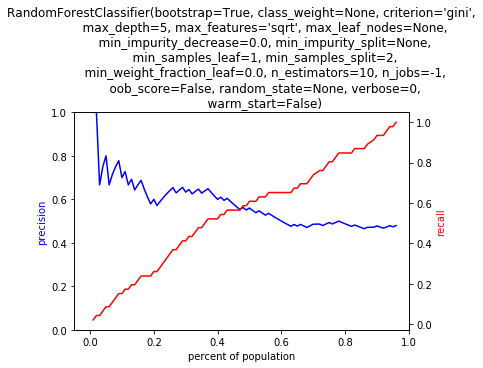

<Figure size 432x288 with 0 Axes>

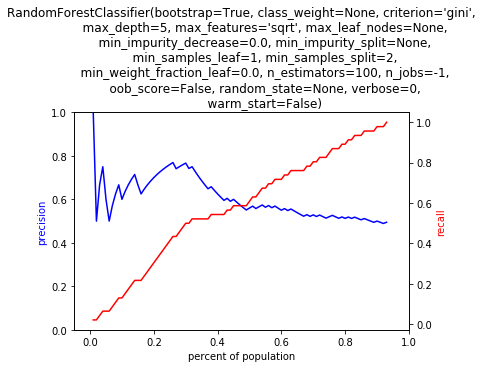

<Figure size 432x288 with 0 Axes>

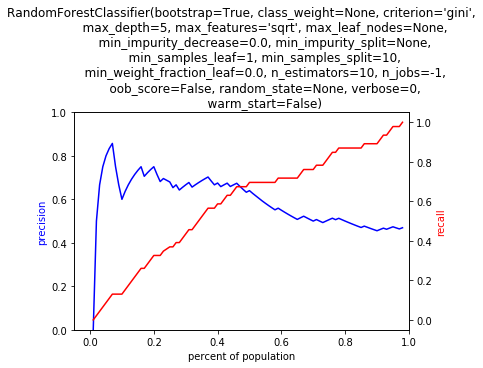

<Figure size 432x288 with 0 Axes>

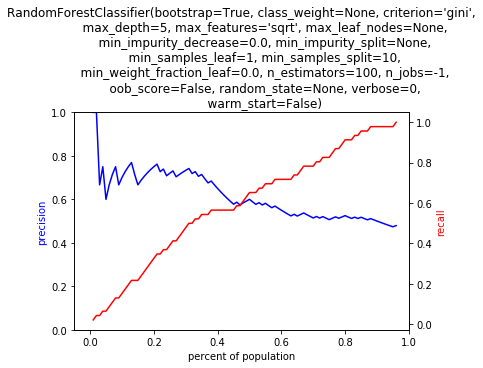

<Figure size 432x288 with 0 Axes>

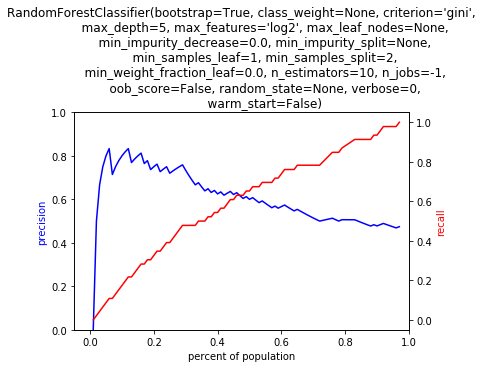

<Figure size 432x288 with 0 Axes>

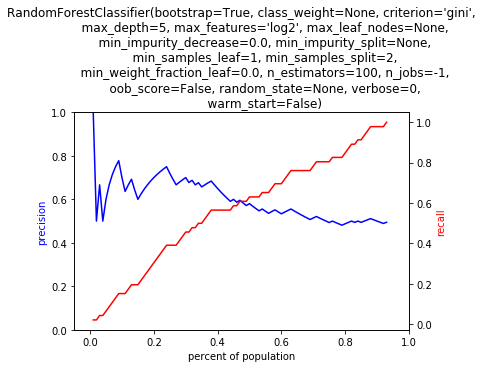

<Figure size 432x288 with 0 Axes>

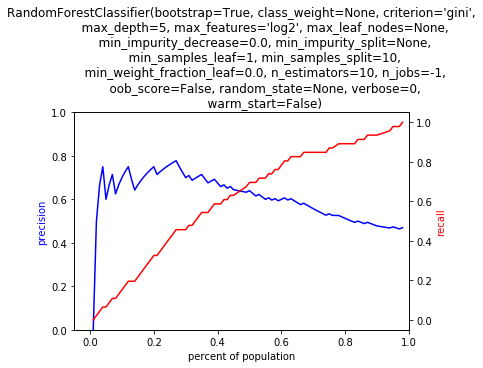

<Figure size 432x288 with 0 Axes>

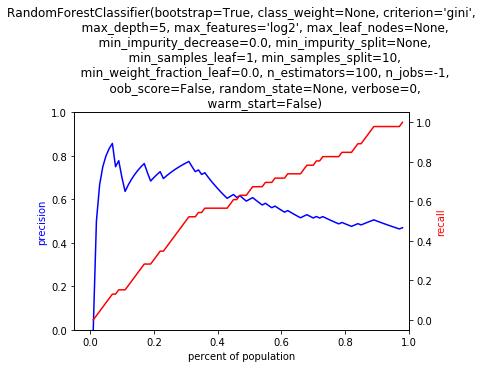

<Figure size 432x288 with 0 Axes>

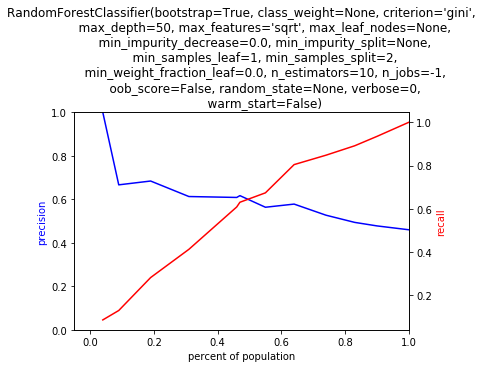

<Figure size 432x288 with 0 Axes>

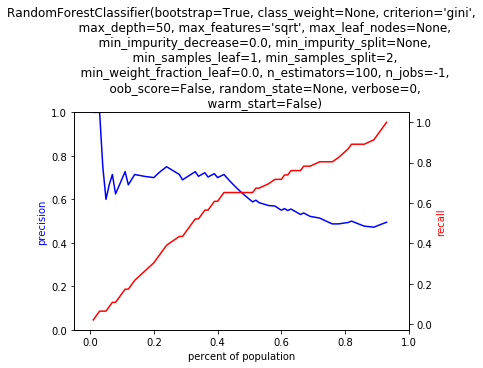

<Figure size 432x288 with 0 Axes>

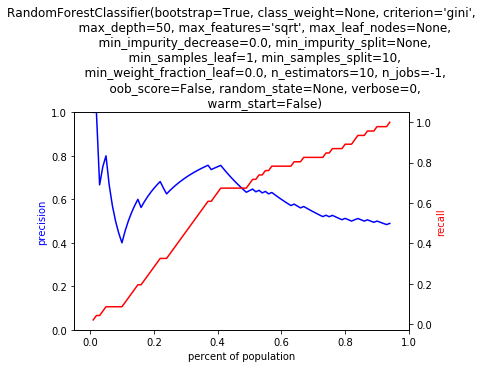

<Figure size 432x288 with 0 Axes>

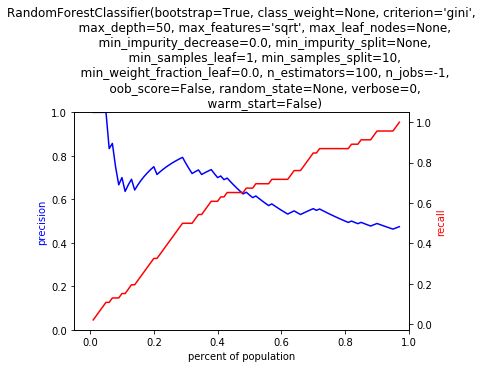

<Figure size 432x288 with 0 Axes>

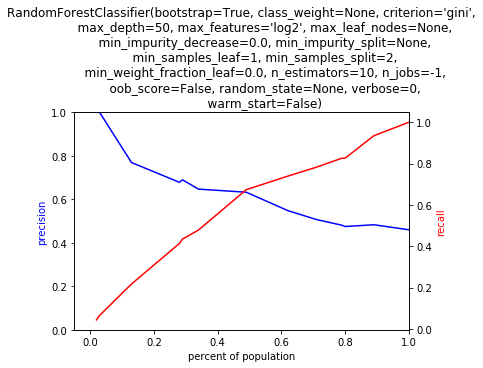

<Figure size 432x288 with 0 Axes>

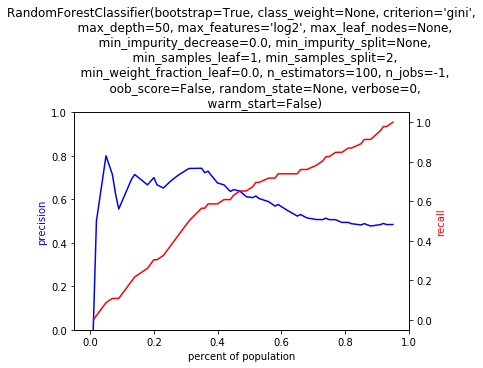

<Figure size 432x288 with 0 Axes>

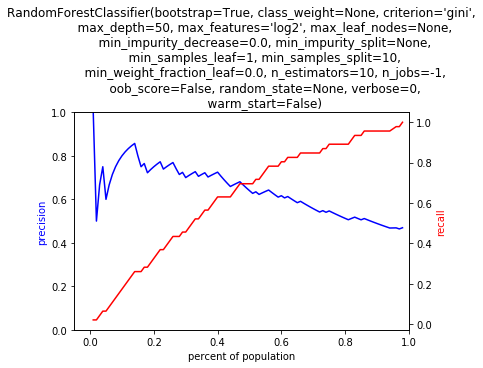

<Figure size 432x288 with 0 Axes>

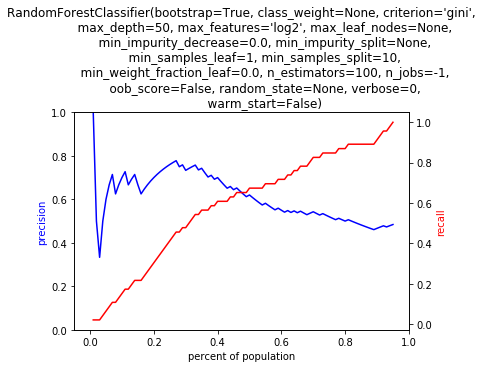

DT


<Figure size 432x288 with 0 Axes>

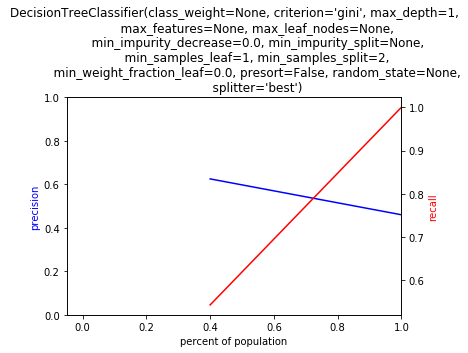

<Figure size 432x288 with 0 Axes>

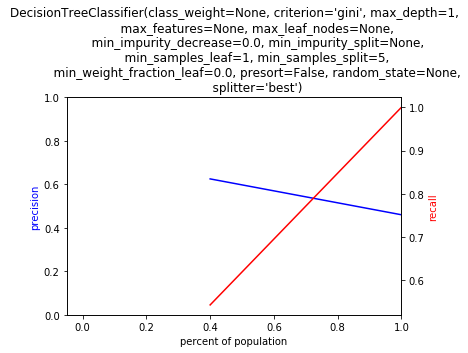

<Figure size 432x288 with 0 Axes>

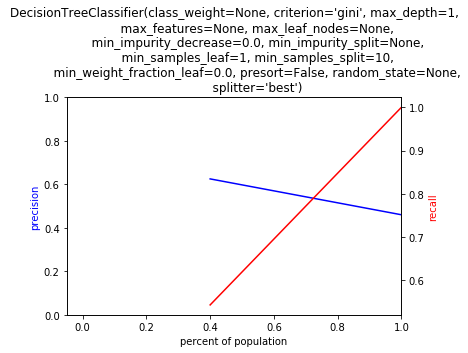

<Figure size 432x288 with 0 Axes>

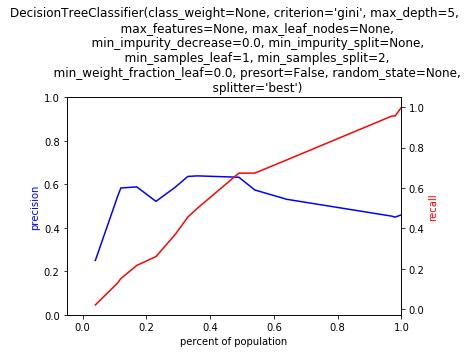

<Figure size 432x288 with 0 Axes>

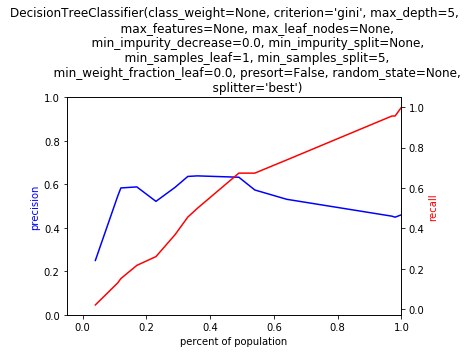

<Figure size 432x288 with 0 Axes>

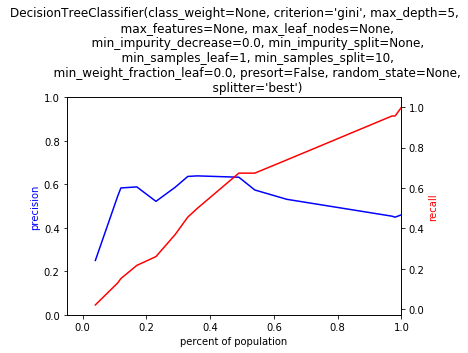

<Figure size 432x288 with 0 Axes>

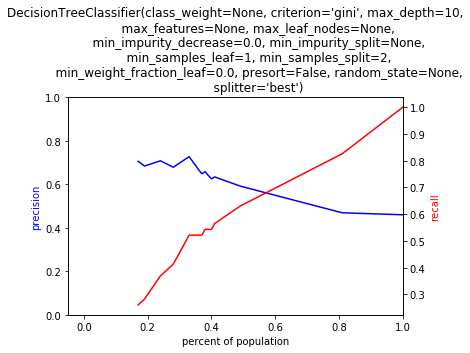

<Figure size 432x288 with 0 Axes>

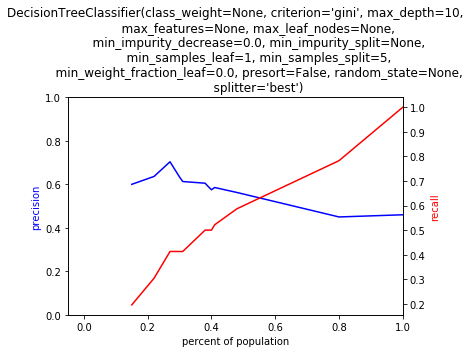

<Figure size 432x288 with 0 Axes>

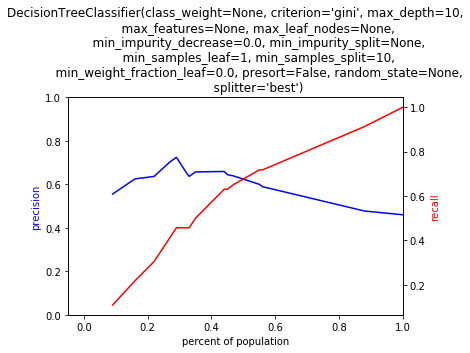

<Figure size 432x288 with 0 Axes>

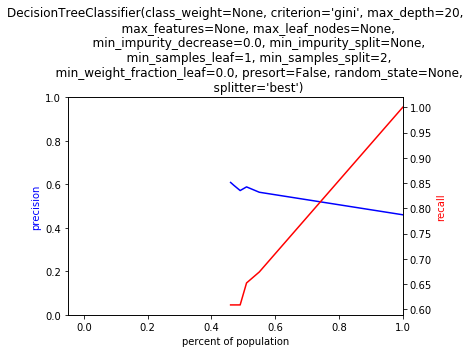

<Figure size 432x288 with 0 Axes>

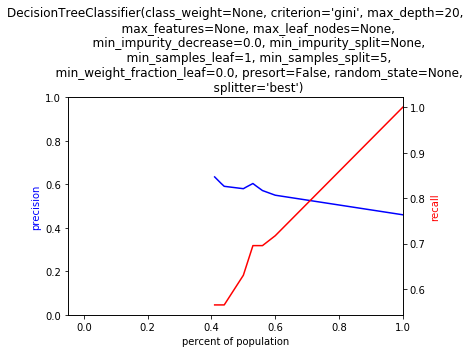

<Figure size 432x288 with 0 Axes>

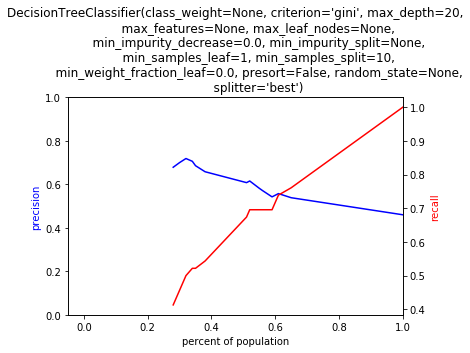

<Figure size 432x288 with 0 Axes>

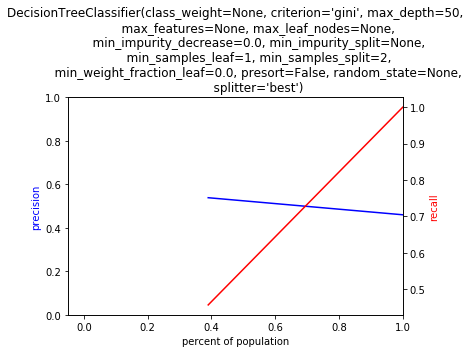

<Figure size 432x288 with 0 Axes>

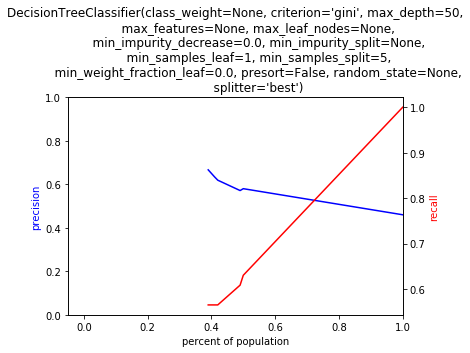

<Figure size 432x288 with 0 Axes>

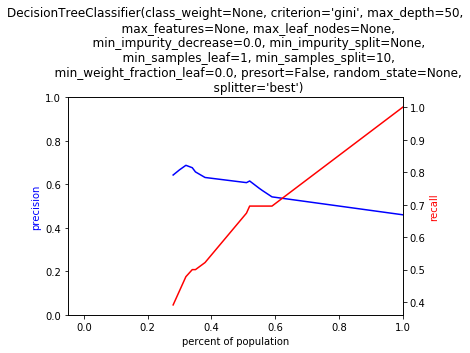

<Figure size 432x288 with 0 Axes>

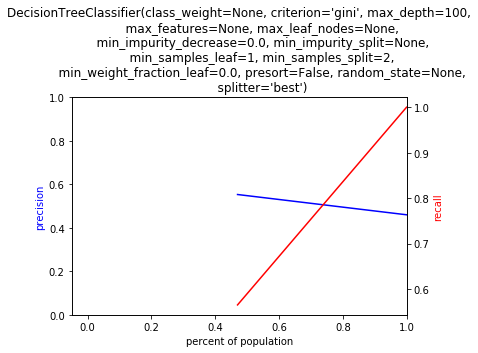

<Figure size 432x288 with 0 Axes>

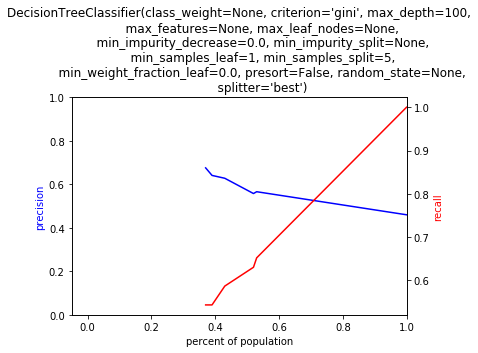

<Figure size 432x288 with 0 Axes>

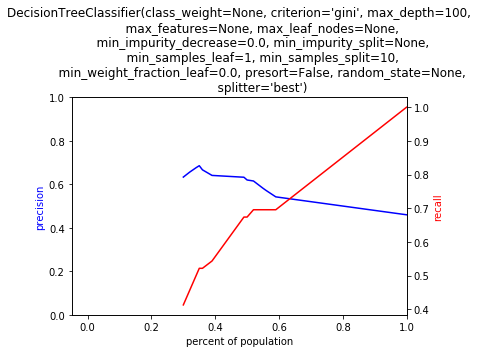

<Figure size 432x288 with 0 Axes>

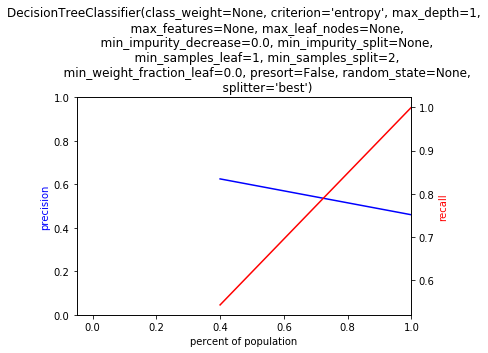

<Figure size 432x288 with 0 Axes>

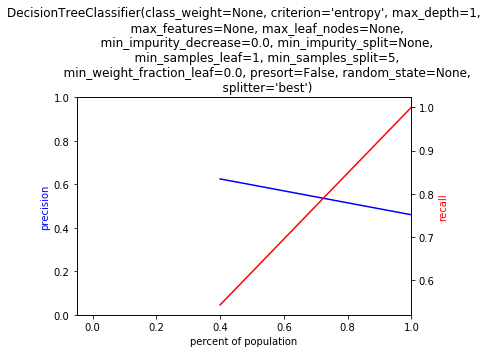

<Figure size 432x288 with 0 Axes>

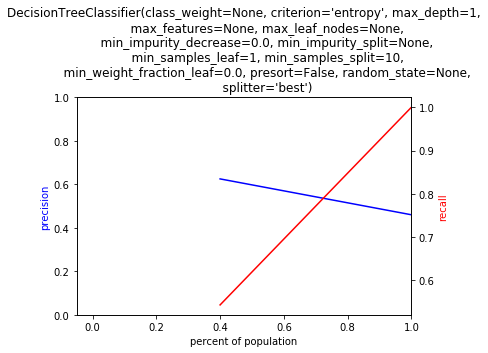

<Figure size 432x288 with 0 Axes>

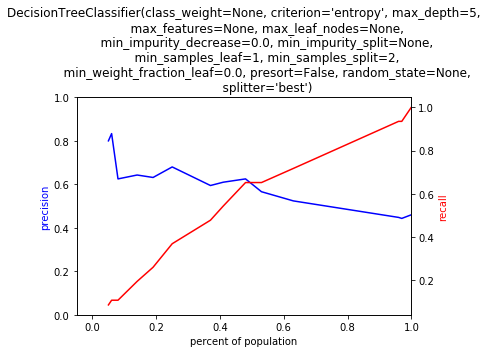

<Figure size 432x288 with 0 Axes>

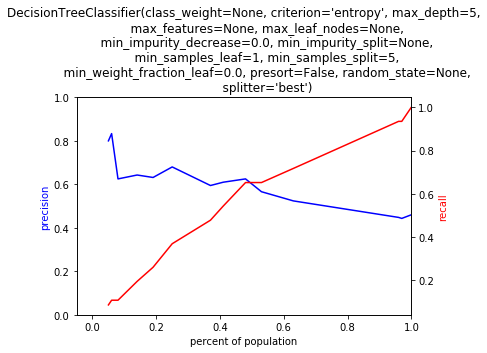

<Figure size 432x288 with 0 Axes>

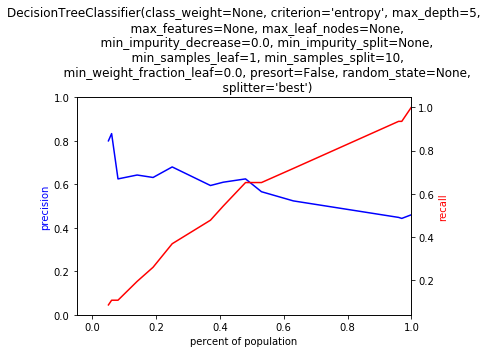

<Figure size 432x288 with 0 Axes>

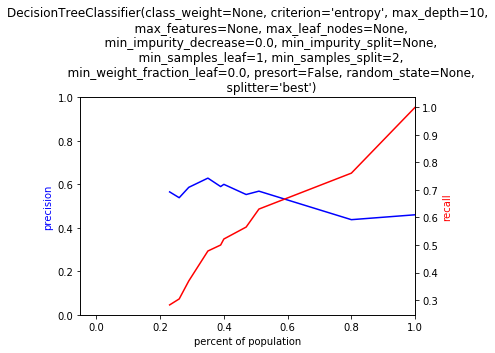

<Figure size 432x288 with 0 Axes>

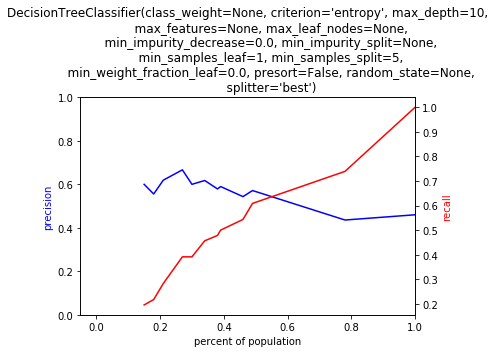

<Figure size 432x288 with 0 Axes>

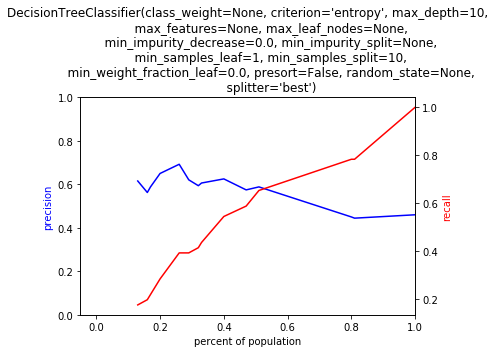

<Figure size 432x288 with 0 Axes>

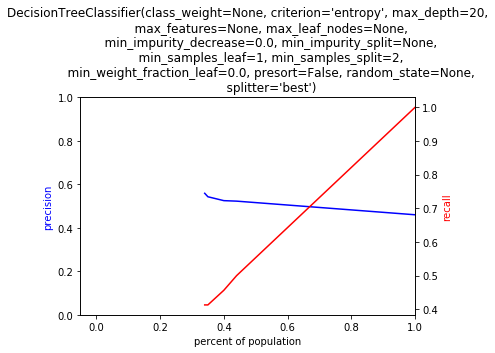

<Figure size 432x288 with 0 Axes>

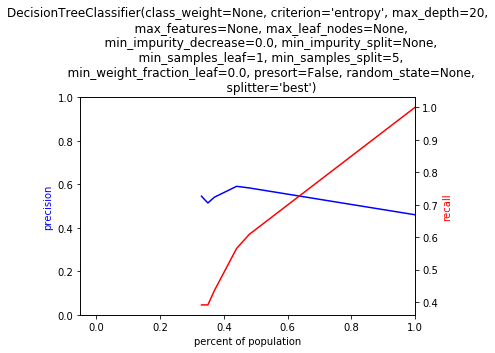

<Figure size 432x288 with 0 Axes>

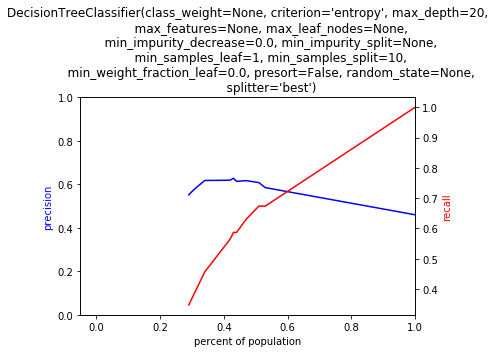

<Figure size 432x288 with 0 Axes>

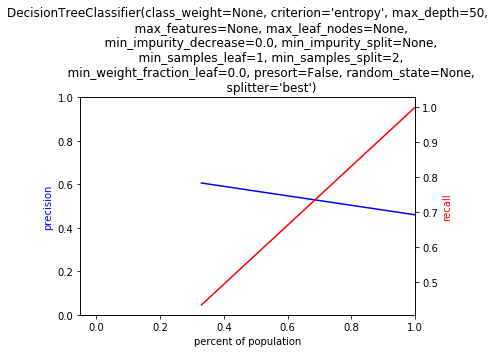

<Figure size 432x288 with 0 Axes>

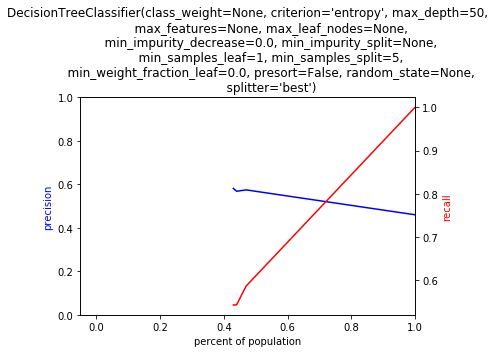

<Figure size 432x288 with 0 Axes>

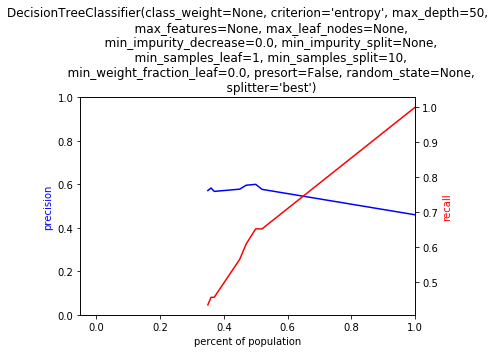

<Figure size 432x288 with 0 Axes>

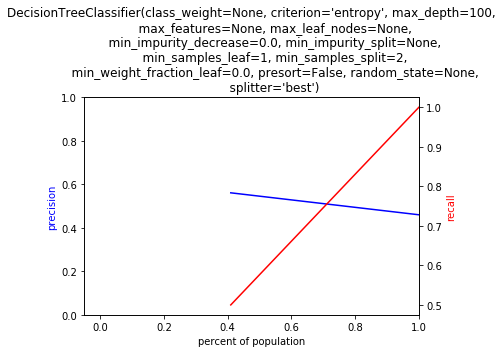

<Figure size 432x288 with 0 Axes>

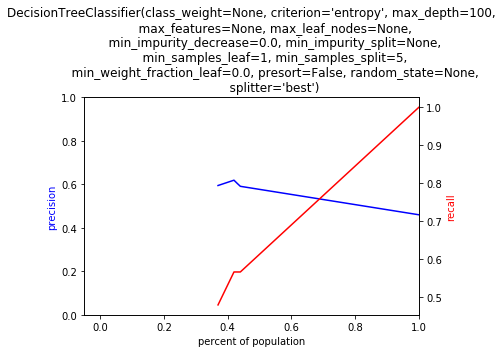

<Figure size 432x288 with 0 Axes>

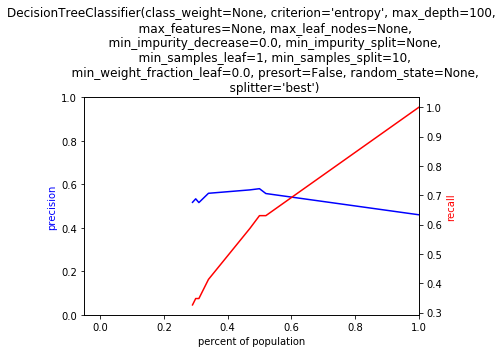

KNN


<Figure size 432x288 with 0 Axes>

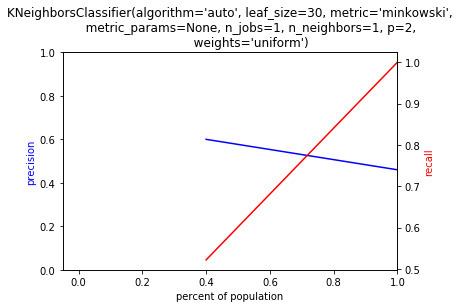

<Figure size 432x288 with 0 Axes>

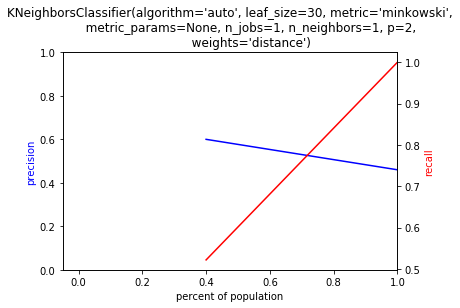

<Figure size 432x288 with 0 Axes>

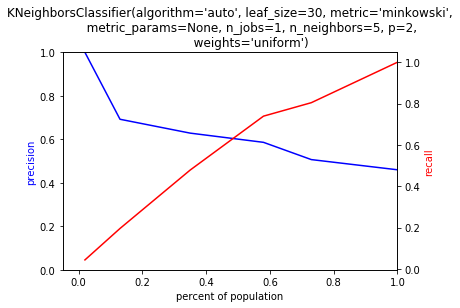

<Figure size 432x288 with 0 Axes>

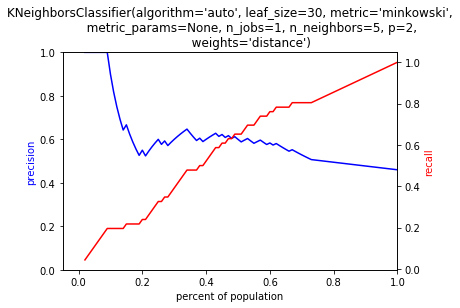

<Figure size 432x288 with 0 Axes>

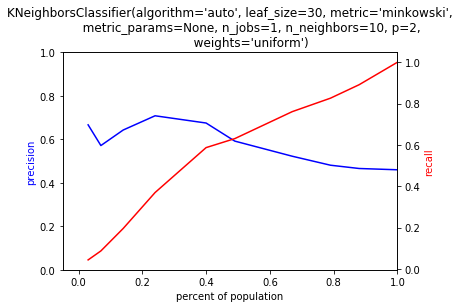

<Figure size 432x288 with 0 Axes>

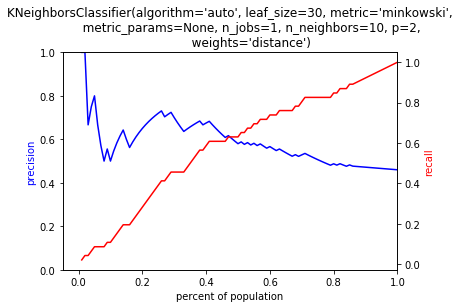

<Figure size 432x288 with 0 Axes>

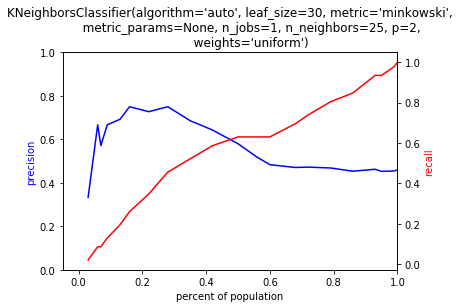

<Figure size 432x288 with 0 Axes>

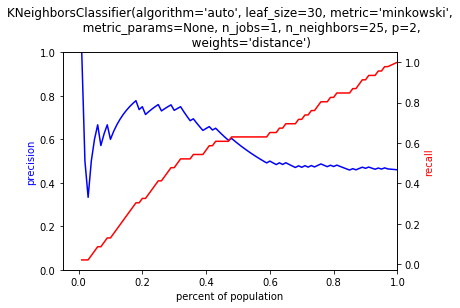

<Figure size 432x288 with 0 Axes>

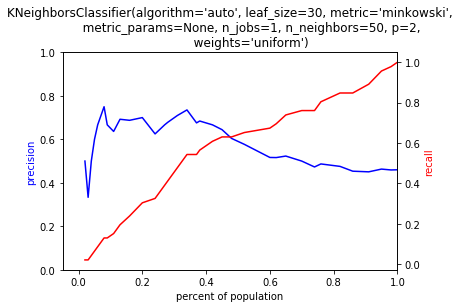

<Figure size 432x288 with 0 Axes>

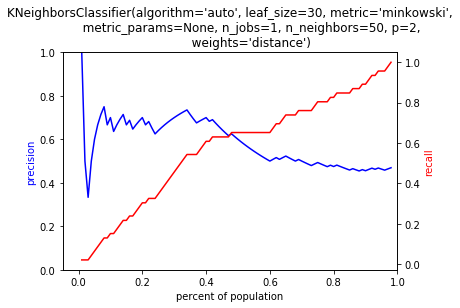

<Figure size 432x288 with 0 Axes>

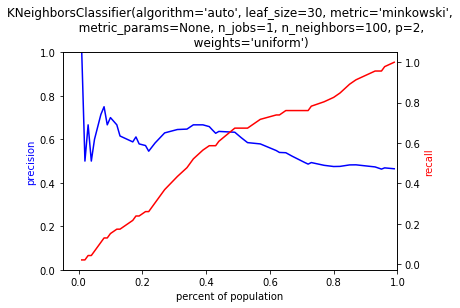

<Figure size 432x288 with 0 Axes>

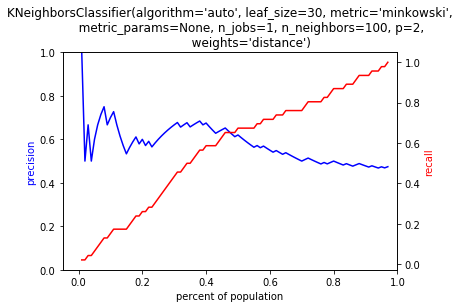

<Figure size 432x288 with 0 Axes>

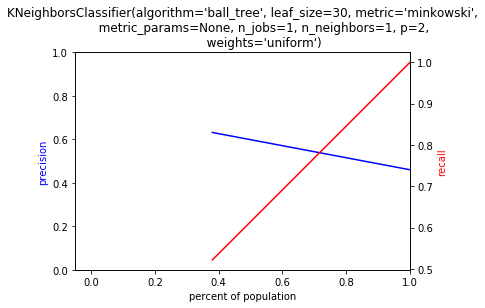

<Figure size 432x288 with 0 Axes>

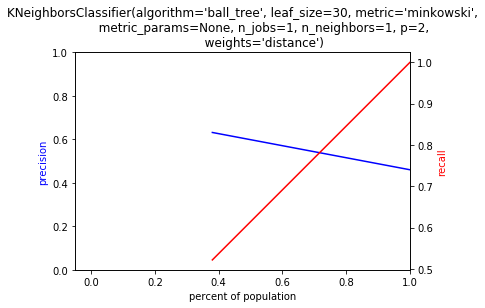

<Figure size 432x288 with 0 Axes>

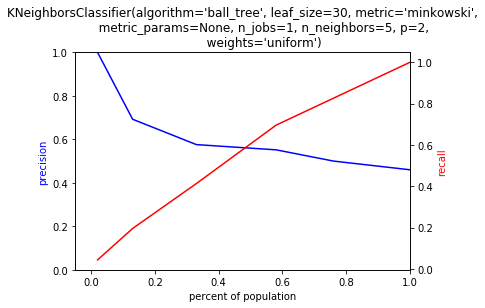

<Figure size 432x288 with 0 Axes>

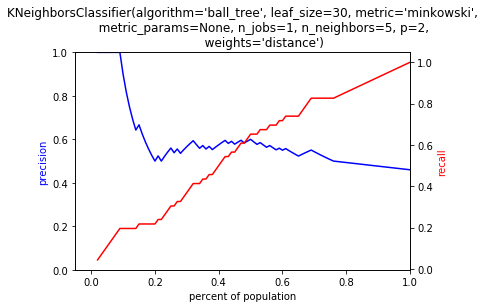

<Figure size 432x288 with 0 Axes>

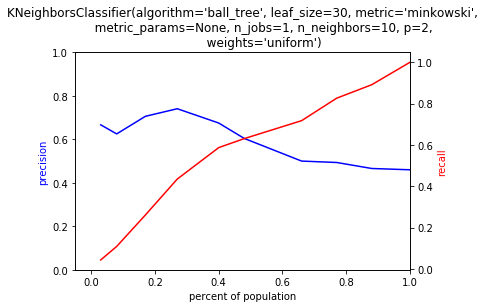

<Figure size 432x288 with 0 Axes>

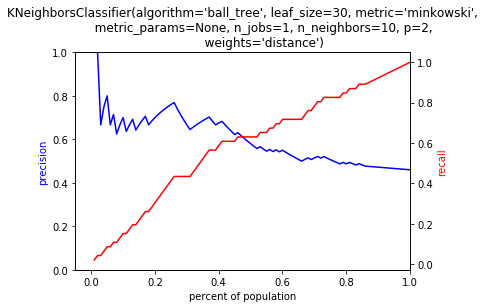

<Figure size 432x288 with 0 Axes>

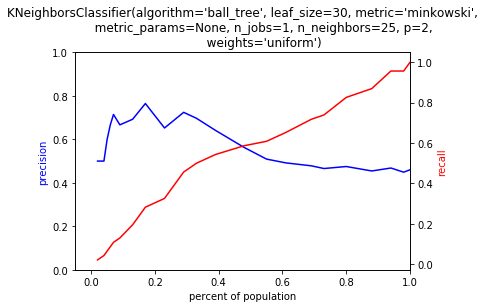

<Figure size 432x288 with 0 Axes>

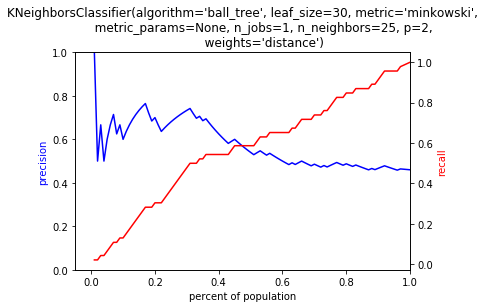

<Figure size 432x288 with 0 Axes>

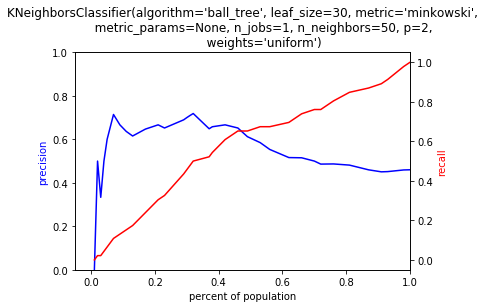

<Figure size 432x288 with 0 Axes>

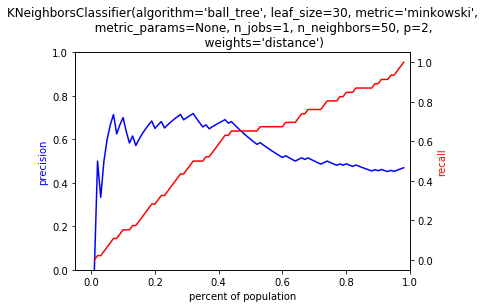

<Figure size 432x288 with 0 Axes>

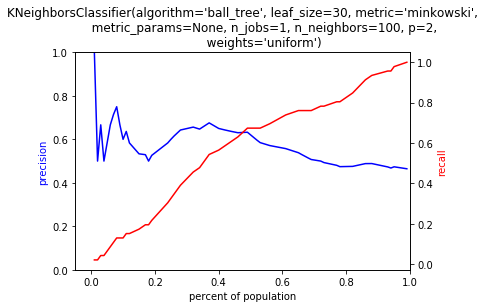

<Figure size 432x288 with 0 Axes>

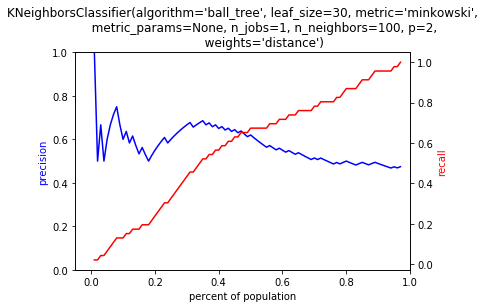

<Figure size 432x288 with 0 Axes>

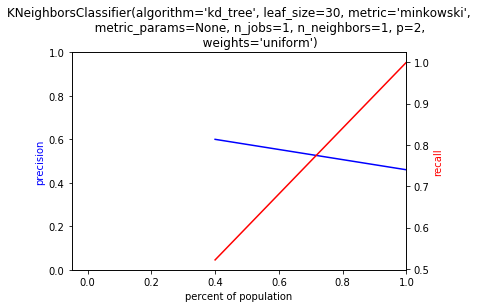

<Figure size 432x288 with 0 Axes>

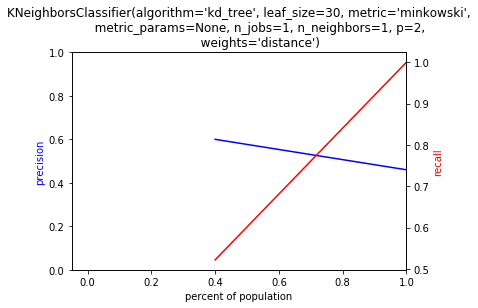

<Figure size 432x288 with 0 Axes>

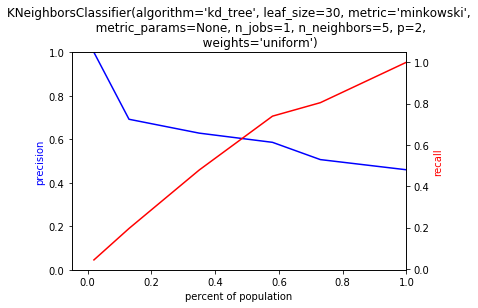

<Figure size 432x288 with 0 Axes>

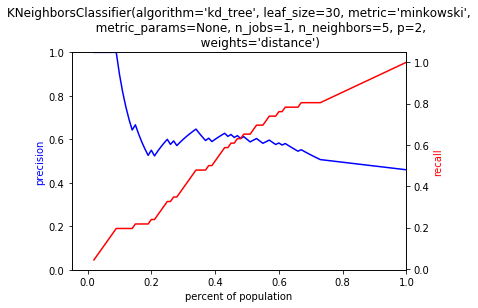

<Figure size 432x288 with 0 Axes>

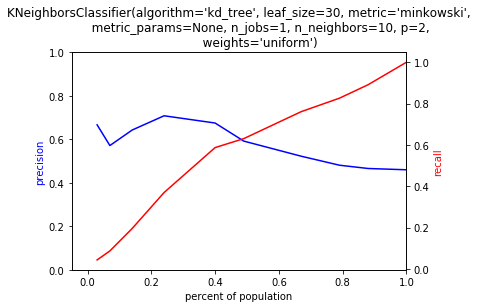

<Figure size 432x288 with 0 Axes>

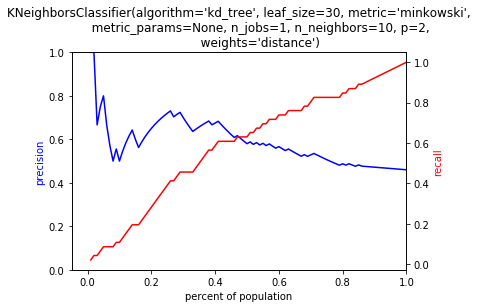

<Figure size 432x288 with 0 Axes>

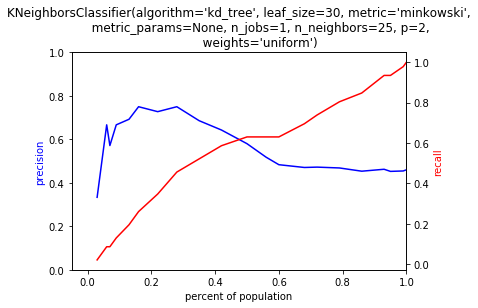

<Figure size 432x288 with 0 Axes>

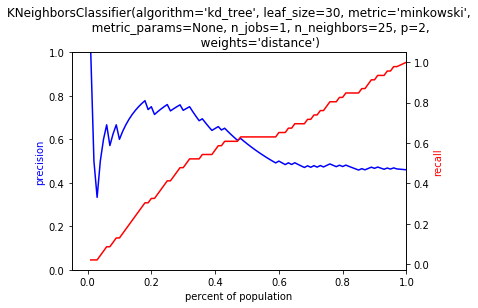

<Figure size 432x288 with 0 Axes>

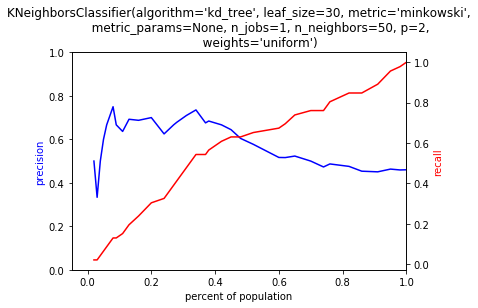

<Figure size 432x288 with 0 Axes>

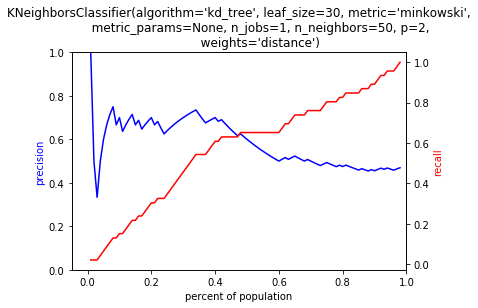

<Figure size 432x288 with 0 Axes>

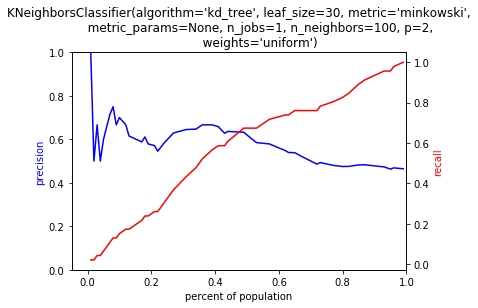

<Figure size 432x288 with 0 Axes>

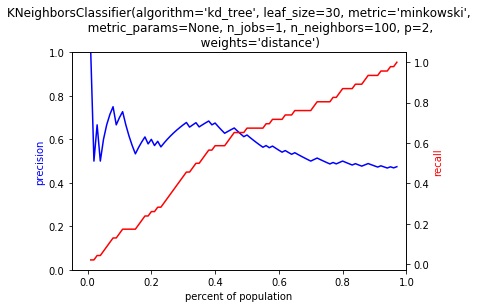

ET


<Figure size 432x288 with 0 Axes>

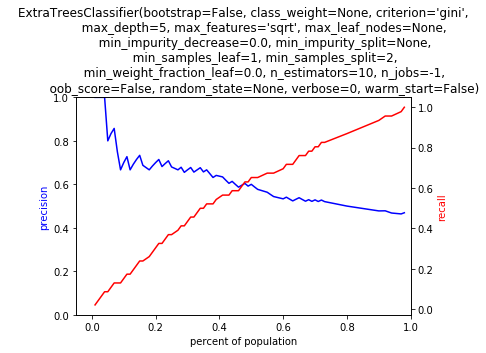

<Figure size 432x288 with 0 Axes>

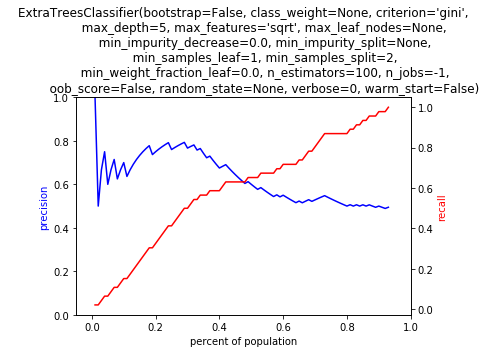

<Figure size 432x288 with 0 Axes>

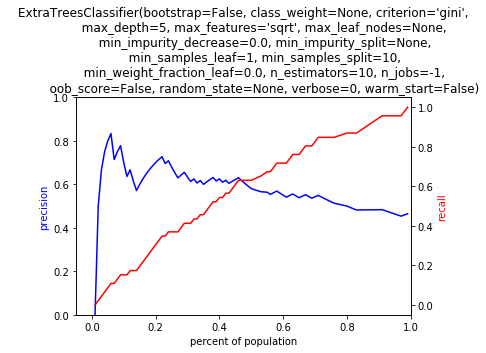

<Figure size 432x288 with 0 Axes>

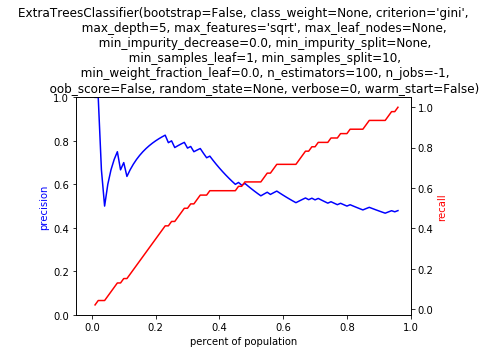

<Figure size 432x288 with 0 Axes>

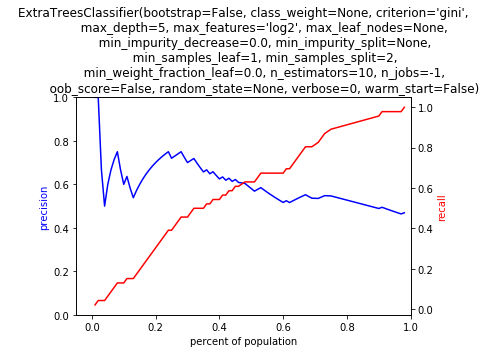

<Figure size 432x288 with 0 Axes>

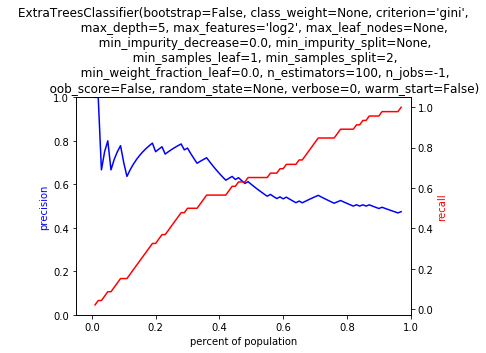

<Figure size 432x288 with 0 Axes>

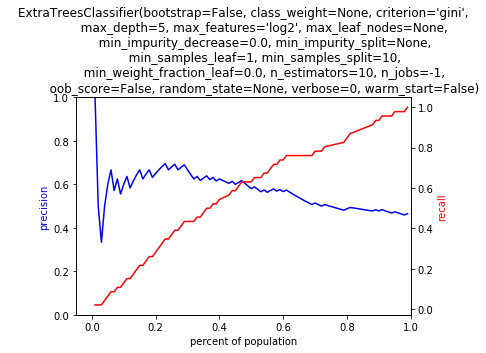

<Figure size 432x288 with 0 Axes>

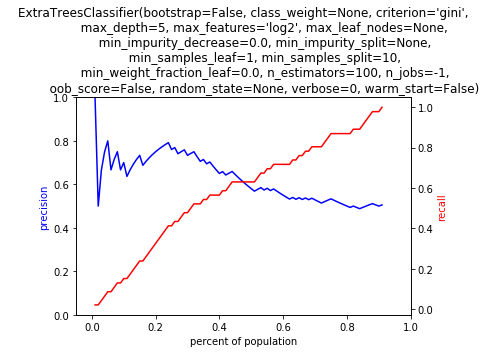

<Figure size 432x288 with 0 Axes>

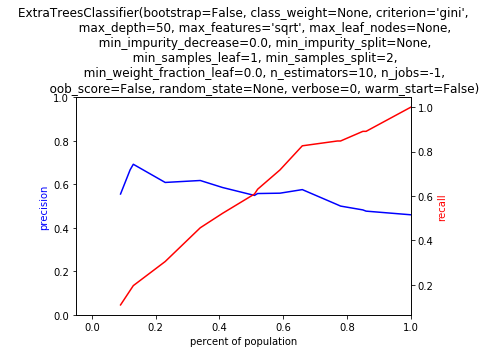

<Figure size 432x288 with 0 Axes>

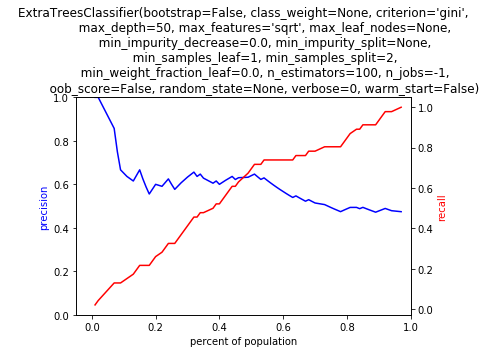

<Figure size 432x288 with 0 Axes>

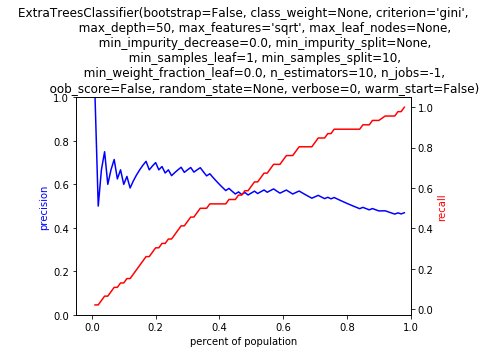

<Figure size 432x288 with 0 Axes>

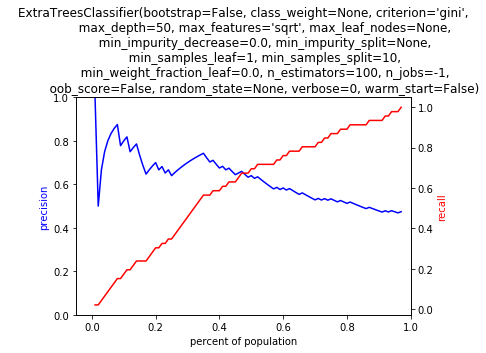

<Figure size 432x288 with 0 Axes>

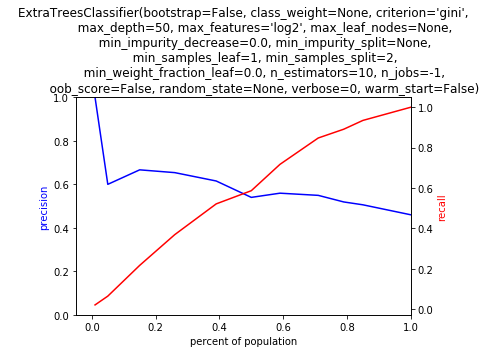

<Figure size 432x288 with 0 Axes>

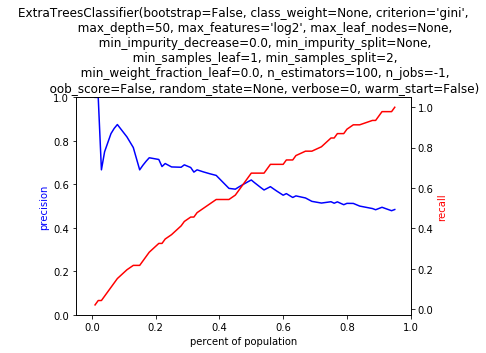

<Figure size 432x288 with 0 Axes>

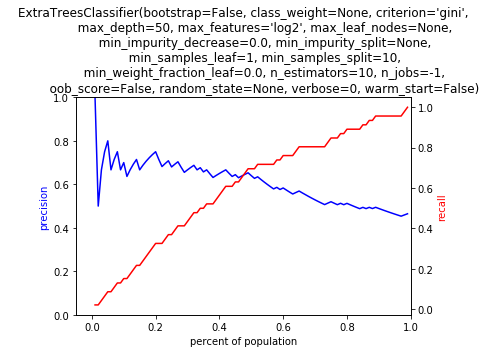

<Figure size 432x288 with 0 Axes>

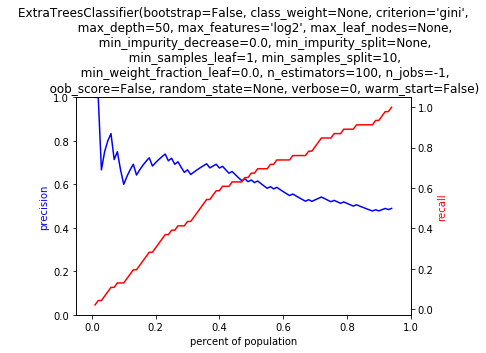

<Figure size 432x288 with 0 Axes>

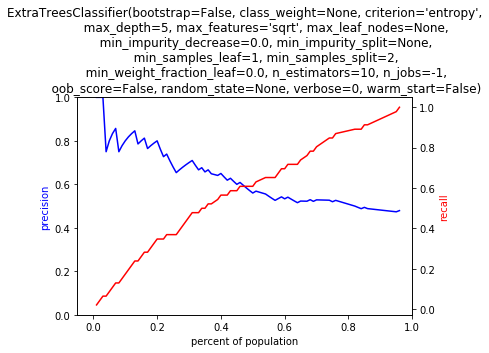

<Figure size 432x288 with 0 Axes>

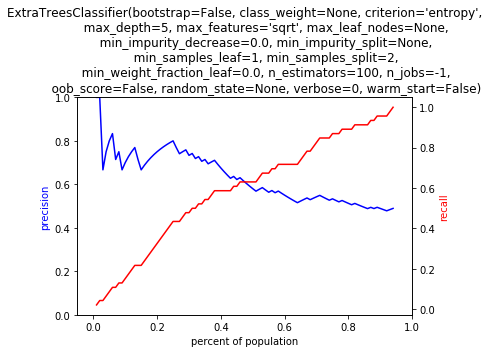

<Figure size 432x288 with 0 Axes>

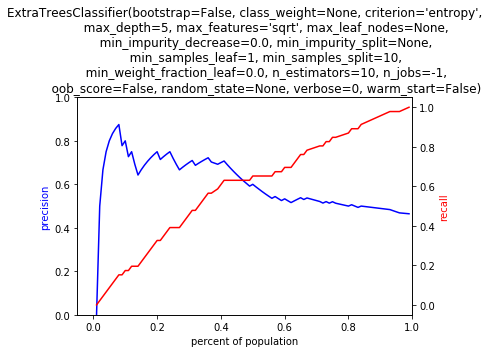

<Figure size 432x288 with 0 Axes>

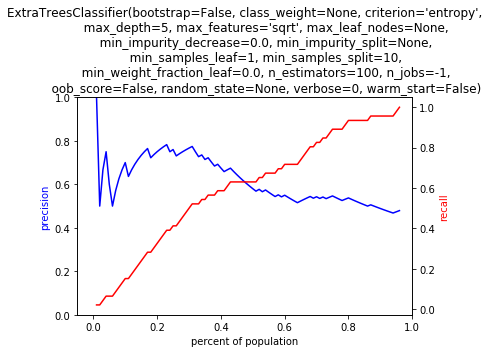

<Figure size 432x288 with 0 Axes>

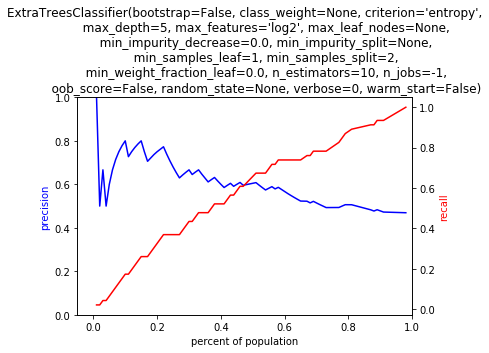

<Figure size 432x288 with 0 Axes>

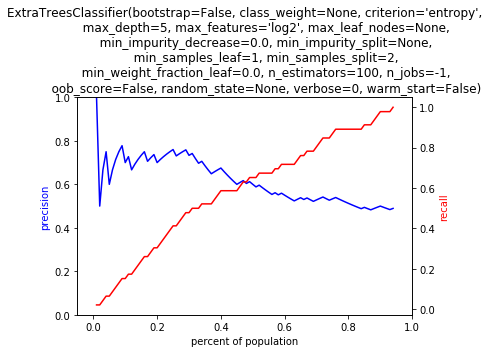

<Figure size 432x288 with 0 Axes>

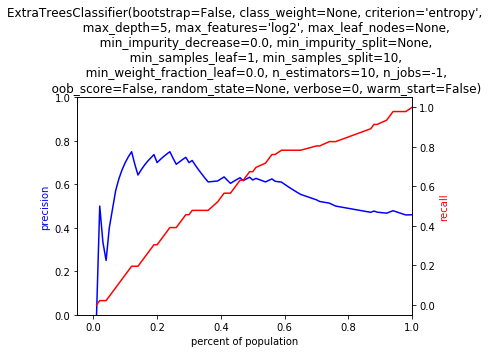

<Figure size 432x288 with 0 Axes>

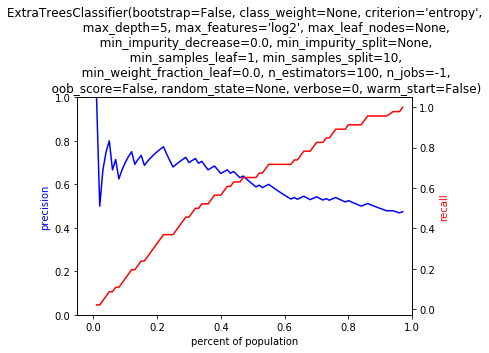

<Figure size 432x288 with 0 Axes>

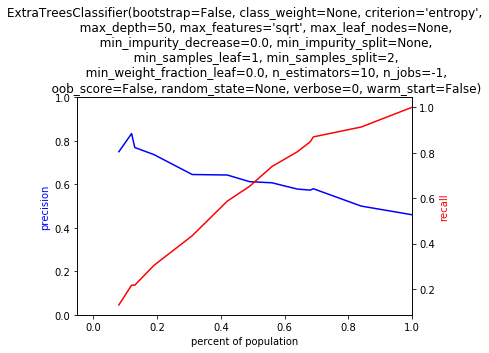

<Figure size 432x288 with 0 Axes>

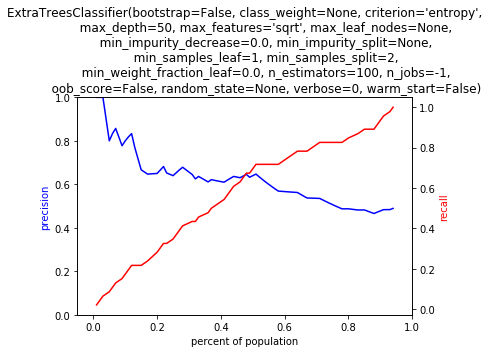

<Figure size 432x288 with 0 Axes>

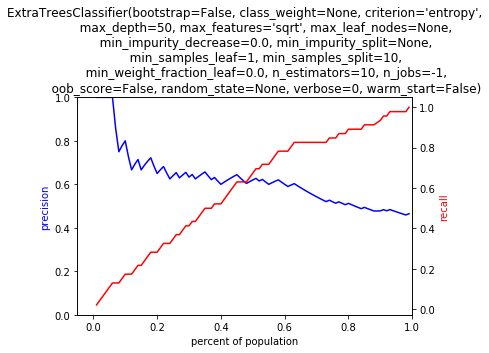

<Figure size 432x288 with 0 Axes>

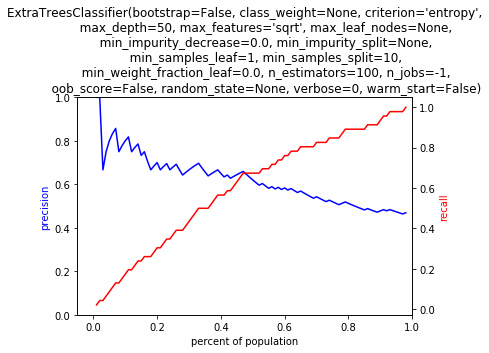

<Figure size 432x288 with 0 Axes>

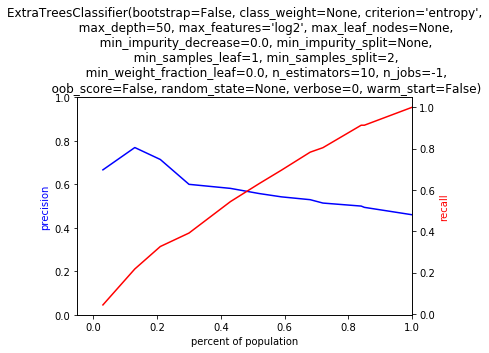

<Figure size 432x288 with 0 Axes>

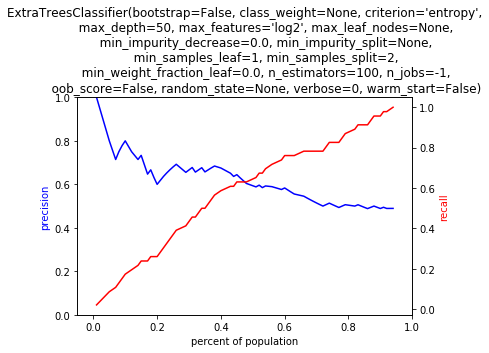

<Figure size 432x288 with 0 Axes>

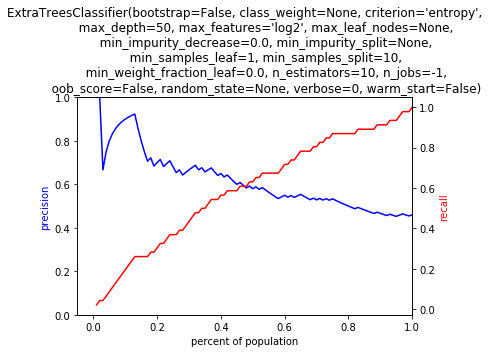

<Figure size 432x288 with 0 Axes>

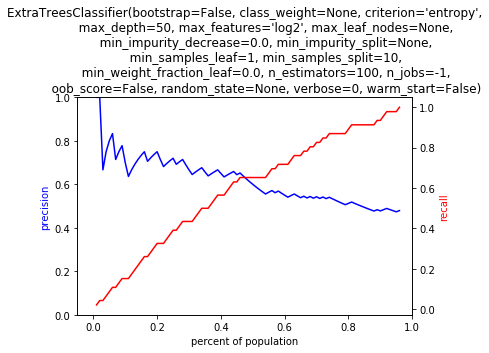

LR


<Figure size 432x288 with 0 Axes>

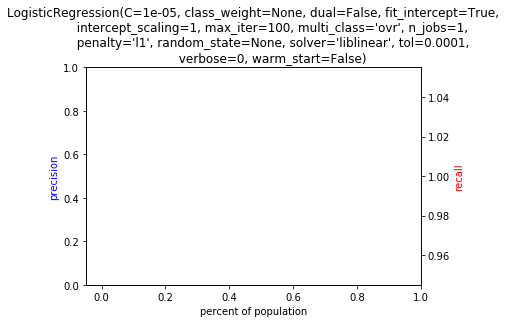

<Figure size 432x288 with 0 Axes>

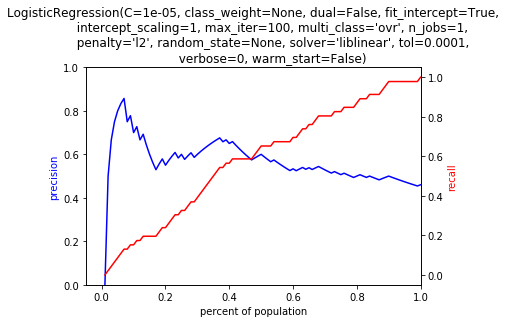

<Figure size 432x288 with 0 Axes>

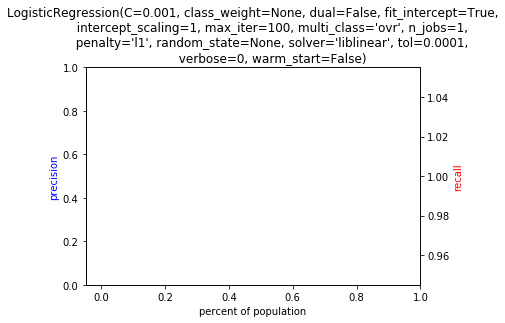

<Figure size 432x288 with 0 Axes>

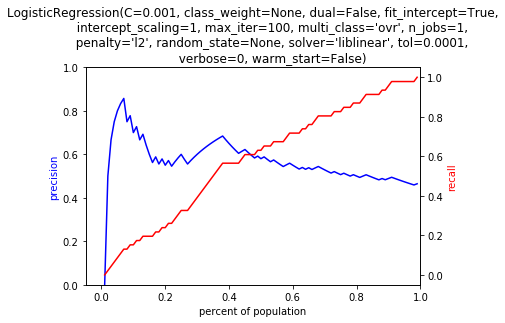

<Figure size 432x288 with 0 Axes>

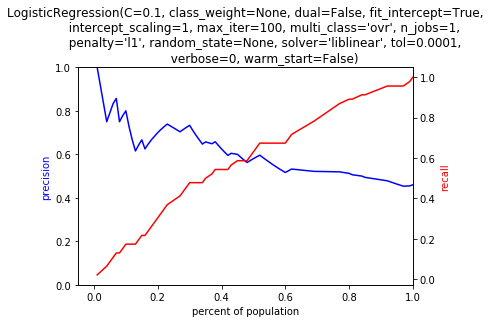

<Figure size 432x288 with 0 Axes>

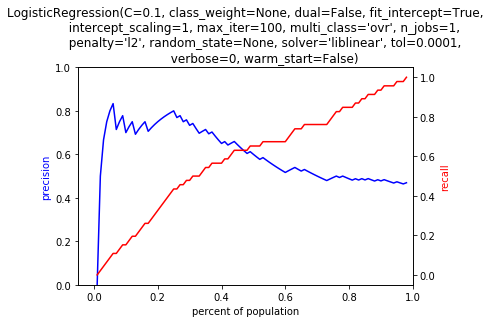

<Figure size 432x288 with 0 Axes>

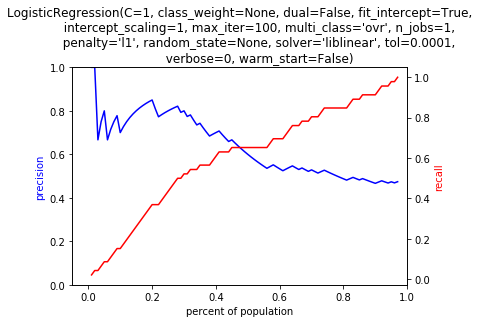

<Figure size 432x288 with 0 Axes>

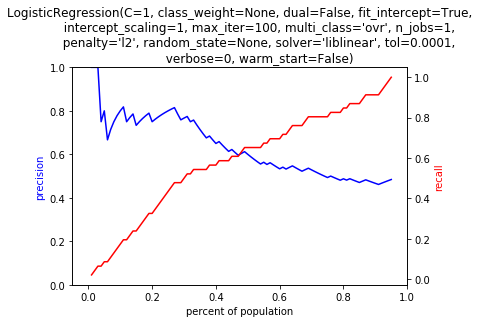

<Figure size 432x288 with 0 Axes>

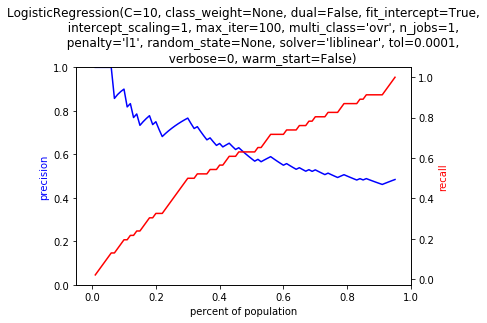

<Figure size 432x288 with 0 Axes>

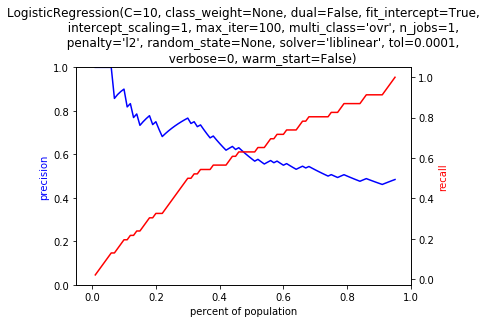

GB


<Figure size 432x288 with 0 Axes>

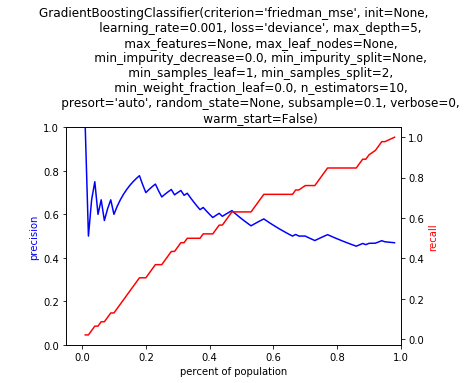

<Figure size 432x288 with 0 Axes>

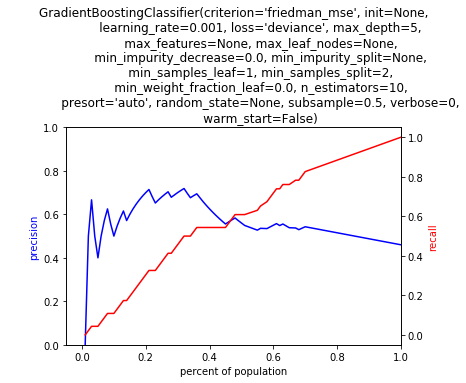

<Figure size 432x288 with 0 Axes>

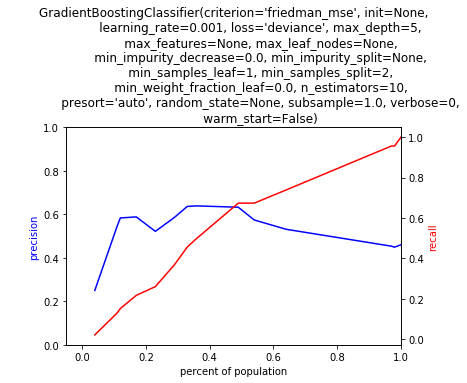

<Figure size 432x288 with 0 Axes>

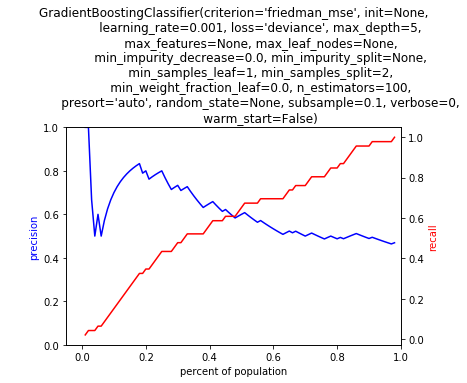

<Figure size 432x288 with 0 Axes>

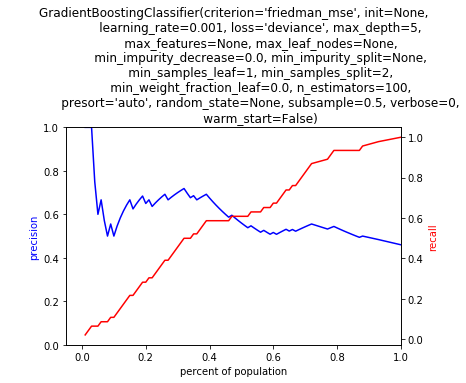

<Figure size 432x288 with 0 Axes>

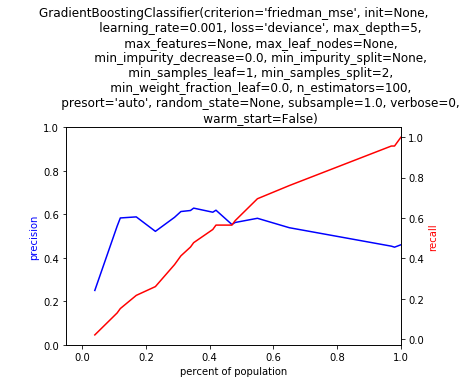

<Figure size 432x288 with 0 Axes>

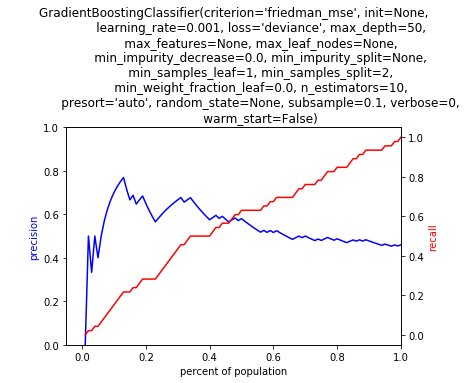

<Figure size 432x288 with 0 Axes>

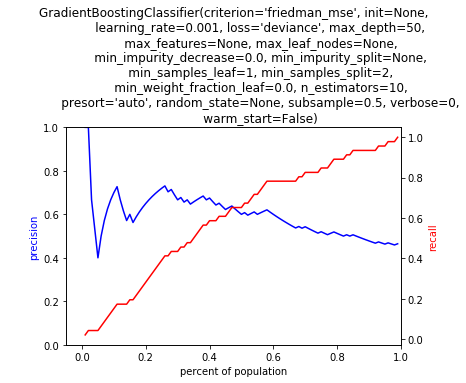

<Figure size 432x288 with 0 Axes>

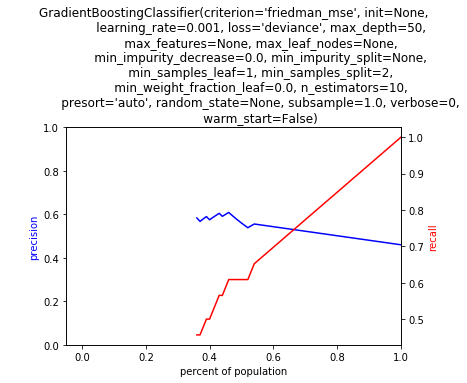

<Figure size 432x288 with 0 Axes>

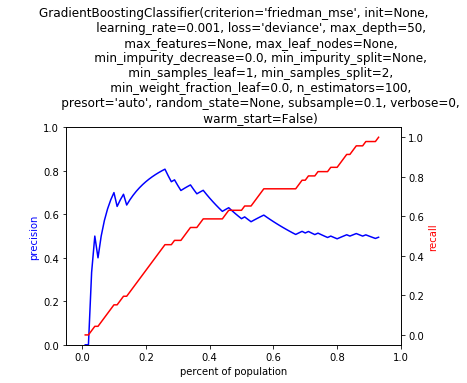

<Figure size 432x288 with 0 Axes>

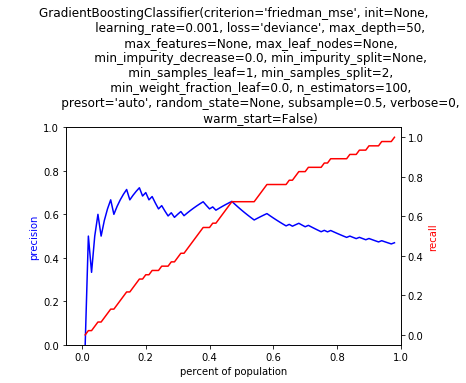

<Figure size 432x288 with 0 Axes>

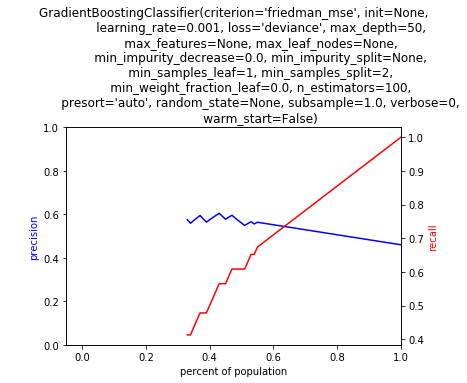

<Figure size 432x288 with 0 Axes>

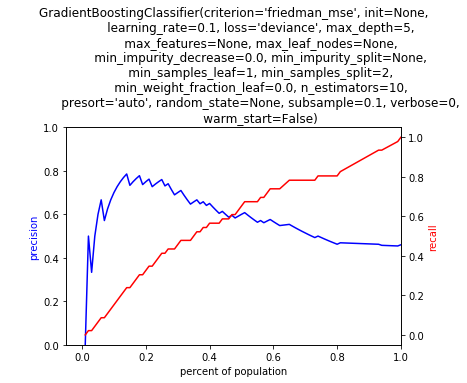

<Figure size 432x288 with 0 Axes>

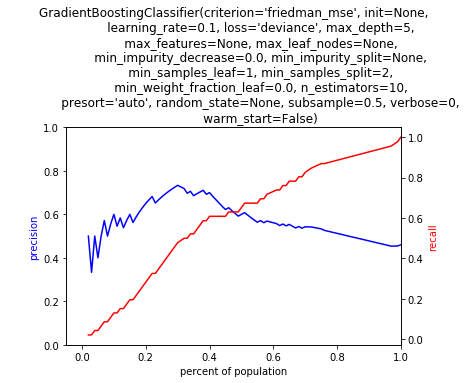

<Figure size 432x288 with 0 Axes>

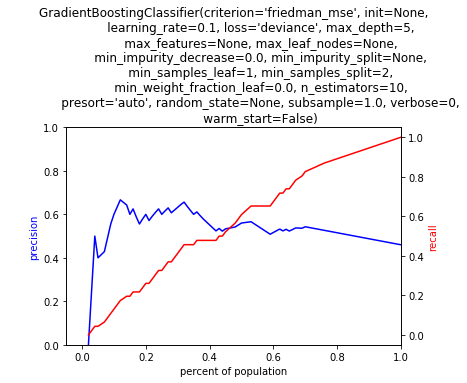

<Figure size 432x288 with 0 Axes>

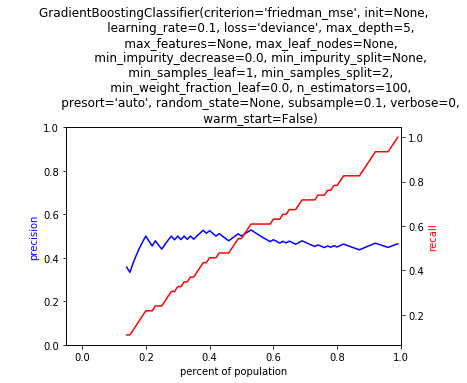

<Figure size 432x288 with 0 Axes>

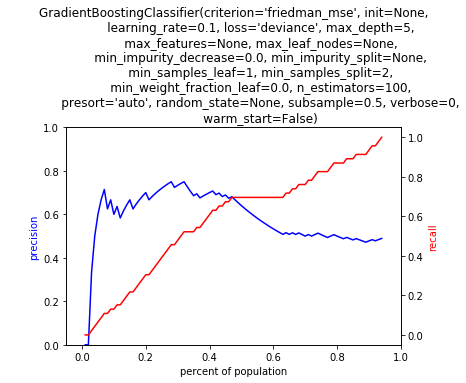

<Figure size 432x288 with 0 Axes>

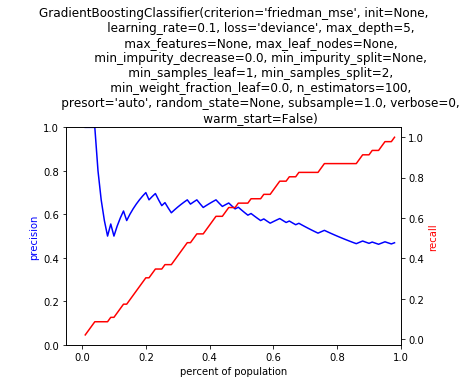

<Figure size 432x288 with 0 Axes>

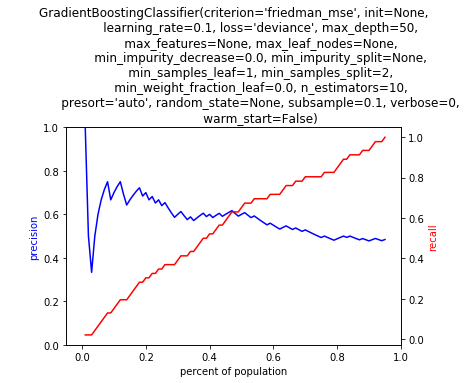

<Figure size 432x288 with 0 Axes>

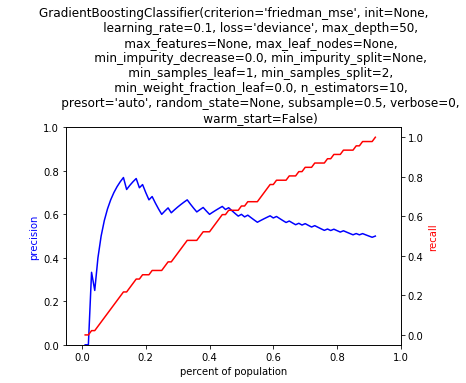

<Figure size 432x288 with 0 Axes>

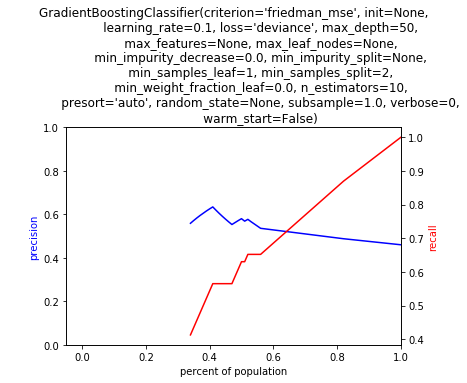

<Figure size 432x288 with 0 Axes>

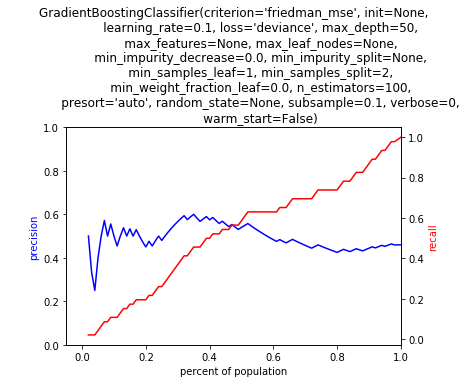

<Figure size 432x288 with 0 Axes>

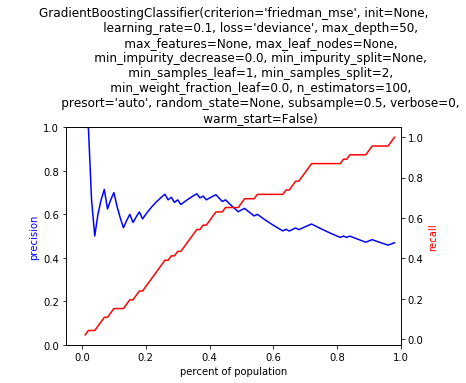

<Figure size 432x288 with 0 Axes>

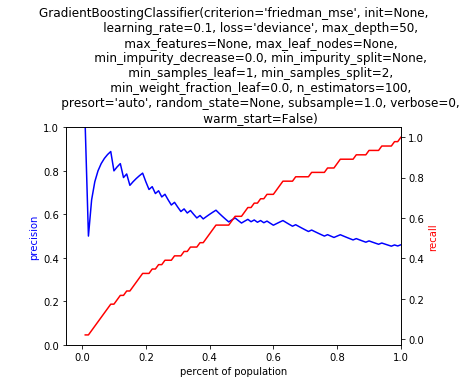

<Figure size 432x288 with 0 Axes>

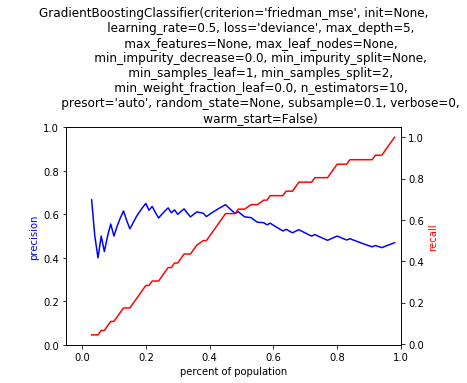

<Figure size 432x288 with 0 Axes>

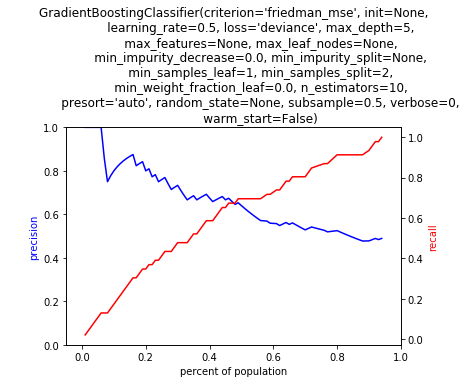

<Figure size 432x288 with 0 Axes>

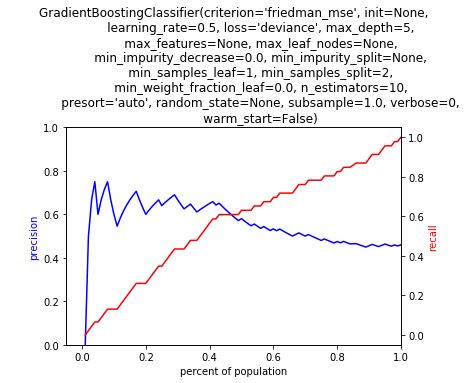

<Figure size 432x288 with 0 Axes>

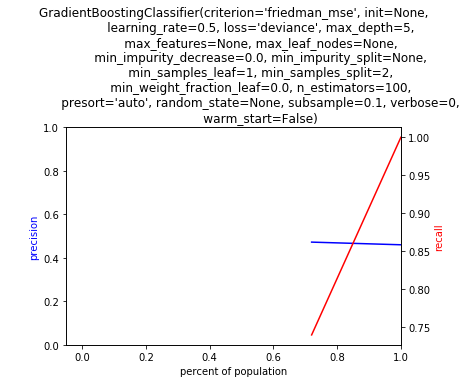

<Figure size 432x288 with 0 Axes>

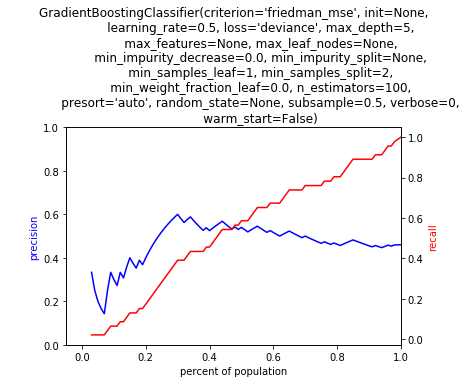

<Figure size 432x288 with 0 Axes>

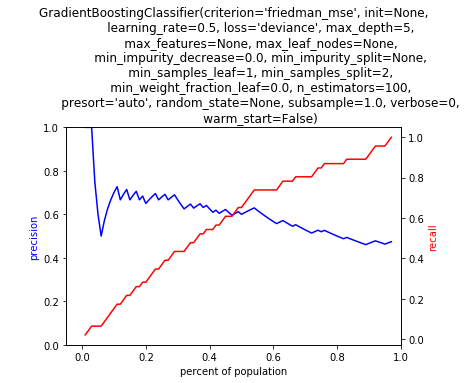

<Figure size 432x288 with 0 Axes>

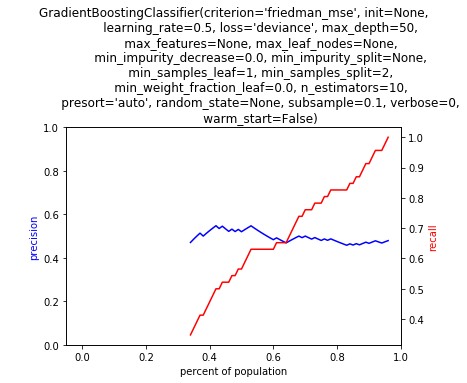

<Figure size 432x288 with 0 Axes>

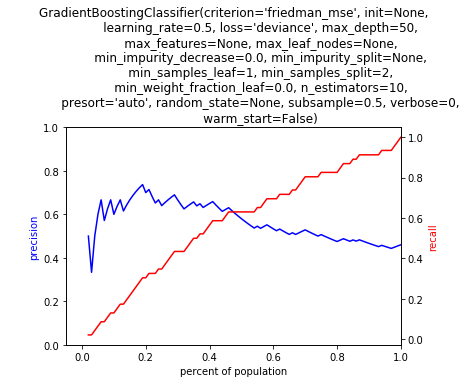

<Figure size 432x288 with 0 Axes>

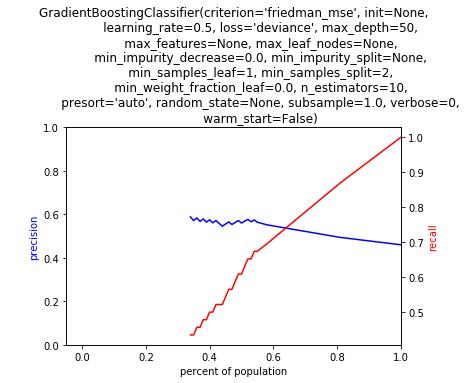

<Figure size 432x288 with 0 Axes>

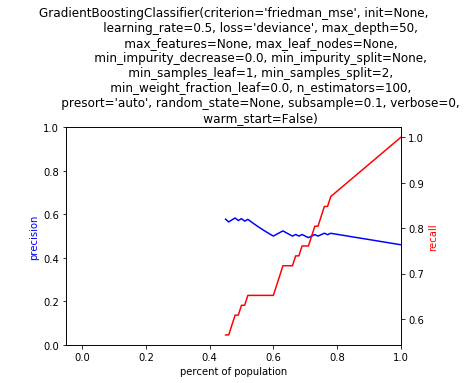

<Figure size 432x288 with 0 Axes>

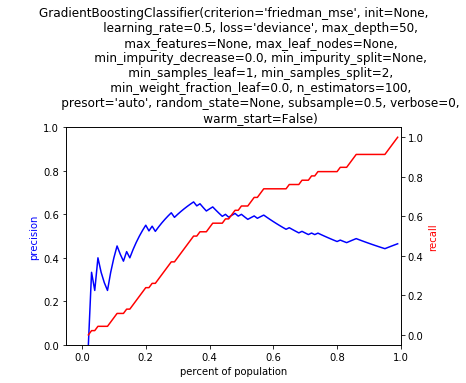

<Figure size 432x288 with 0 Axes>

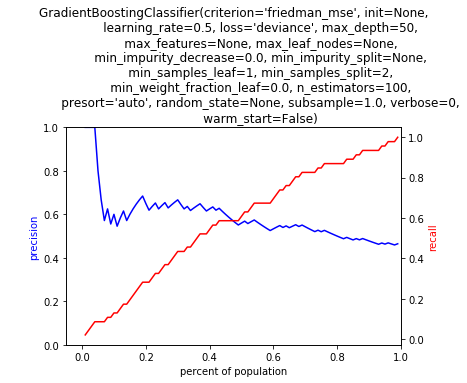

AB


<Figure size 432x288 with 0 Axes>

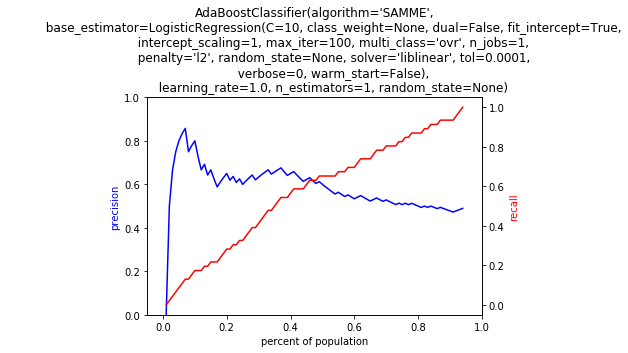

<Figure size 432x288 with 0 Axes>

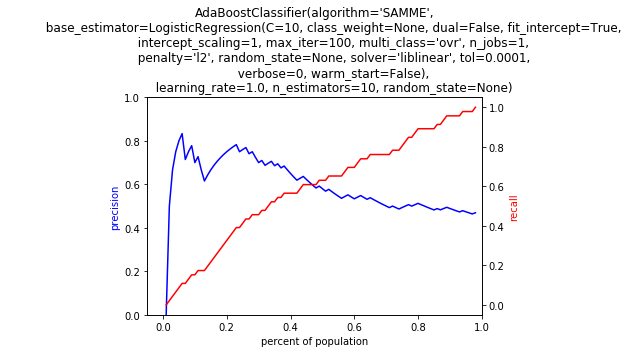

<Figure size 432x288 with 0 Axes>

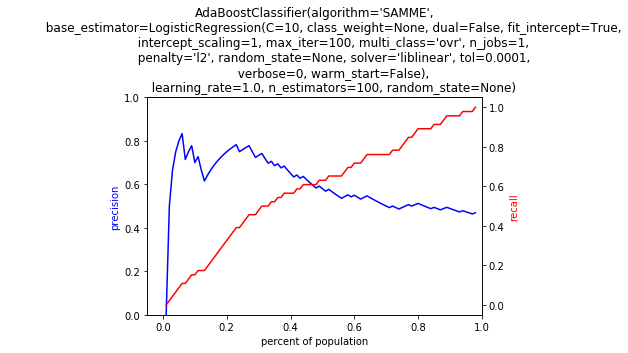

<Figure size 432x288 with 0 Axes>

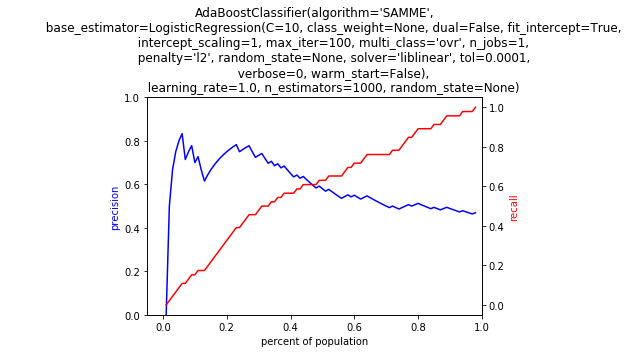

<Figure size 432x288 with 0 Axes>

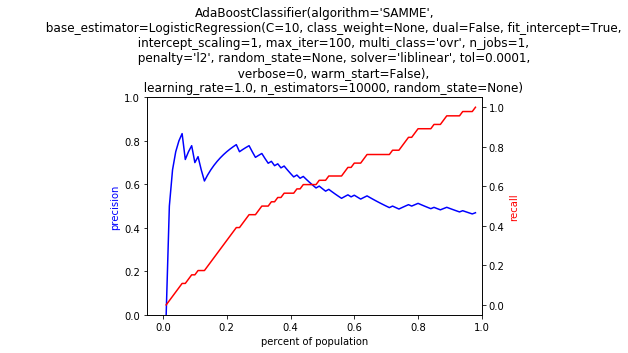

<Figure size 432x288 with 0 Axes>

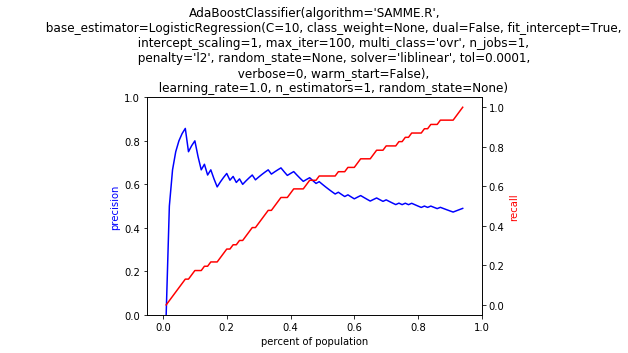

<Figure size 432x288 with 0 Axes>

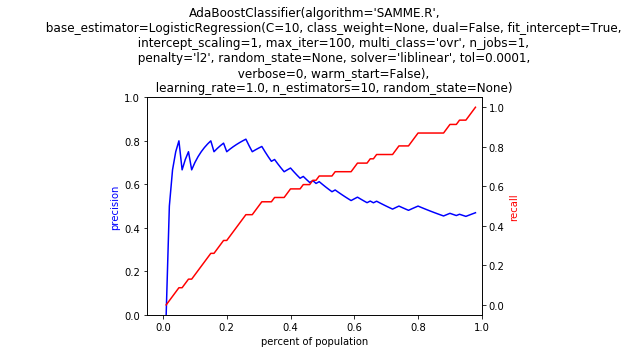

<Figure size 432x288 with 0 Axes>

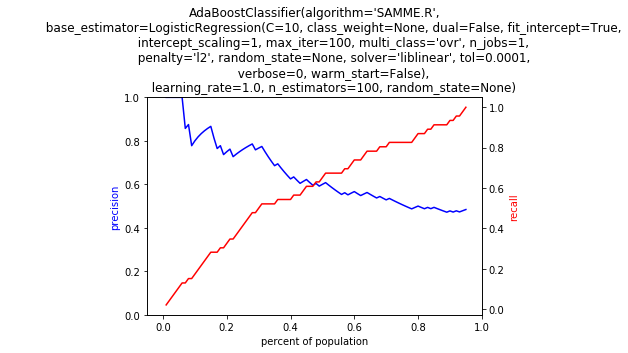

<Figure size 432x288 with 0 Axes>

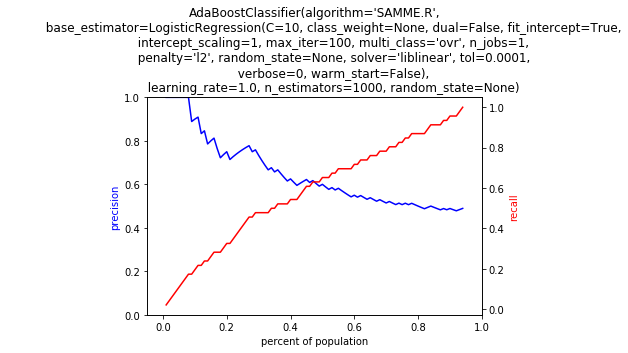

<Figure size 432x288 with 0 Axes>

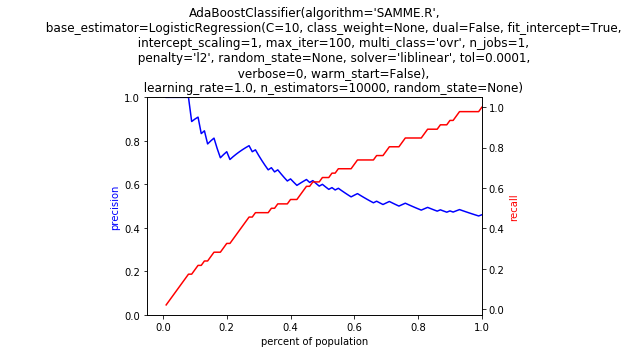

NB


<Figure size 432x288 with 0 Axes>

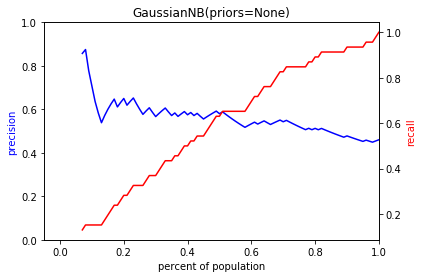

In [102]:
res= BL.run_simple_loop(x_train, x_test, y_train, y_test)